In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
import wandb

from color_train import train_model
from itertools import product
import random
import pandas as pd

In [2]:
# --- Base Configuration (Must match your existing script) ---
BASE_CONFIG = {
    'wandb_project': "CIFAR10-Colorization-Q2-Sweep",
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'seed': 42,
    'NIC': 1,
    'NUM_CLASSES': 24,
    'num_workers': 4,
    'epochs': 25,
    'kernel_size_tconv': 2,
    'centroids_path': 'color_centroids.npy'
}

# --- Hyperparameter Search Space (As specified by the user) ---
PARAM_GRID = {
    'learning_rate': [0.0001, 0.001 , 0.01], # 4 values
    'batch_size': [32, 64, 128],                      # 3 values
    'NF': [8, 16, 32],                                # 3 values
    'kernel_size_conv': [3, 5],                       # 2 values
    'optimizer': ["SGD", "Adam"]                      # 2 values
}

In [3]:
# --- Generate List of Configurations (Sampling 20 unique runs) ---

NUM_RUNS = 20
all_keys = list(PARAM_GRID.keys())
all_values = list(PARAM_GRID.values())

# Generate all possible combinations
all_combinations = list(product(*all_values))

# Randomly sample 20 unique combinations
random.seed(BASE_CONFIG['seed'])
sampled_combinations = random.sample(all_combinations, NUM_RUNS)

CONFIG_LIST = []
for combo in sampled_combinations:
    run_config = BASE_CONFIG.copy()
    for key, value in zip(all_keys, combo):
        run_config[key] = value
    CONFIG_LIST.append(run_config)

print(f"Generated {len(CONFIG_LIST)} unique configurations for sequential hyperparameter tuning.")
# --- End of Configuration Generation ---

Generated 20 unique configurations for sequential hyperparameter tuning.


Starting sequential execution of 20 runs...
Run1_LR0.01_BS32_NF32_K3_Adam


wandb: Currently logged in as: 0410shubham (0410shubham-iit-bombay) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 1.9894 | Val Loss: 1.8720
-> Saved new best model with Val Loss: 1.8720
Epoch 2/25 | Train Loss: 1.8445 | Val Loss: 1.7609
-> Saved new best model with Val Loss: 1.7609
Epoch 3/25 | Train Loss: 1.8023 | Val Loss: 1.7449
-> Saved new best model with Val Loss: 1.7449
Epoch 4/25 | Train Loss: 1.7636 | Val Loss: 2.0490
Epoch 5/25 | Train Loss: 1.7379 | Val Loss: 1.7116
-> Saved new best model with Val Loss: 1.7116
Epoch 6/25 | Train Loss: 1.7253 | Val Loss: 1.7023
-> Saved new best model with Val Loss: 1.7023
Epoch 7/25 | Train Loss: 1.7078 | Val Loss: 1.7968
Epoch 8/25 | Train Loss: 1.6953 | Val Loss: 1.7307
Epoch 9/25 | Train Loss: 1.6891 | Val Loss: 1.6915
-> Saved new best model with Val Loss: 1.6915
Epoch 10/25 | Train Loss: 1.6801 | Val Loss: 1.7015
Epoch 11/25 | Train Loss: 1.6685 | Val Loss: 1.7427
Epoch 12/25 | Train Loss: 1.6639 | Val Loss: 1.6448
-> S

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


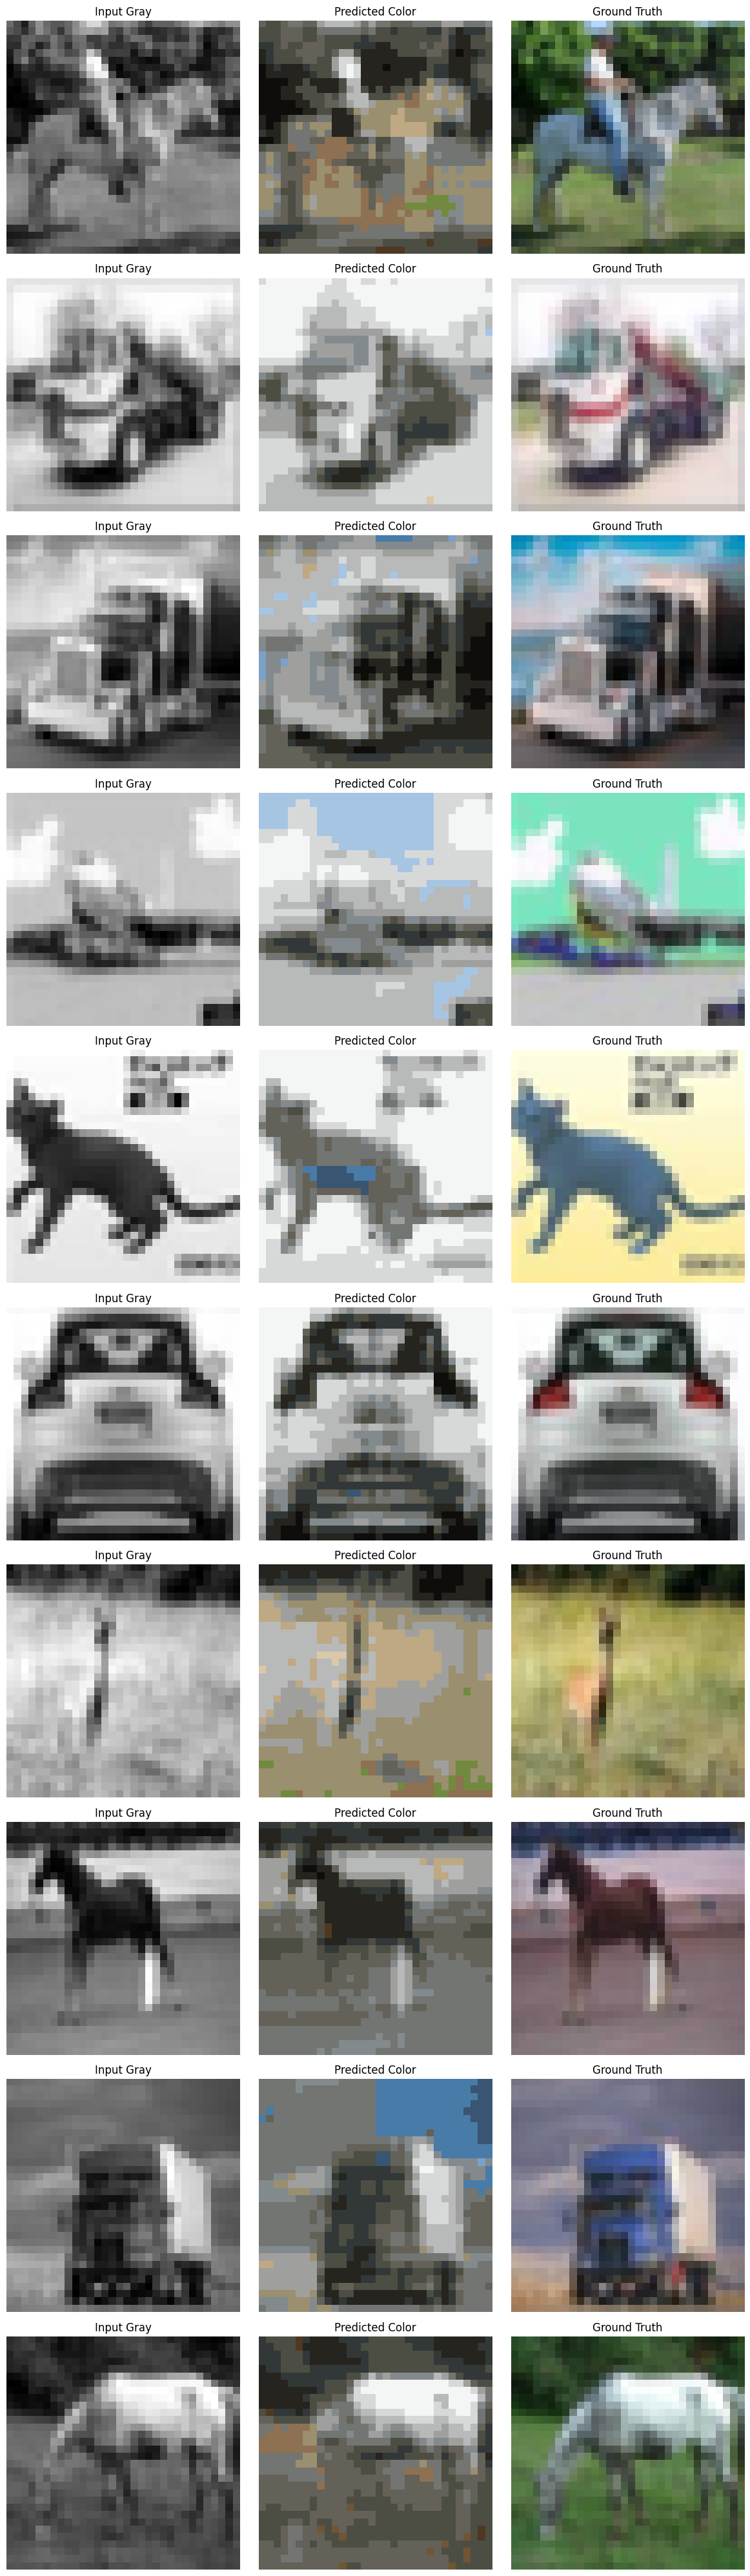

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run2_LR0.0001_BS64_NF8_K5_SGD


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 3.2710 | Val Loss: 3.2392
-> Saved new best model with Val Loss: 3.2392
Epoch 2/25 | Train Loss: 3.2145 | Val Loss: 3.1918
-> Saved new best model with Val Loss: 3.1918
Epoch 3/25 | Train Loss: 3.1709 | Val Loss: 3.1524
-> Saved new best model with Val Loss: 3.1524
Epoch 4/25 | Train Loss: 3.1320 | Val Loss: 3.1143
-> Saved new best model with Val Loss: 3.1143
Epoch 5/25 | Train Loss: 3.0929 | Val Loss: 3.0748
-> Saved new best model with Val Loss: 3.0748
Epoch 6/25 | Train Loss: 3.0520 | Val Loss: 3.0337
-> Saved new best model with Val Loss: 3.0337
Epoch 7/25 | Train Loss: 3.0105 | Val Loss: 2.9920
-> Saved new best model with Val Loss: 2.9920
Epoch 8/25 | Train Loss: 2.9713 | Val Loss: 2.9571
-> Saved new best model with Val Loss: 2.9571
Epoch 9/25 | Train Loss: 2.9345 | Val Loss: 2.9182
-> Saved new best model with Val Loss: 2.9182
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


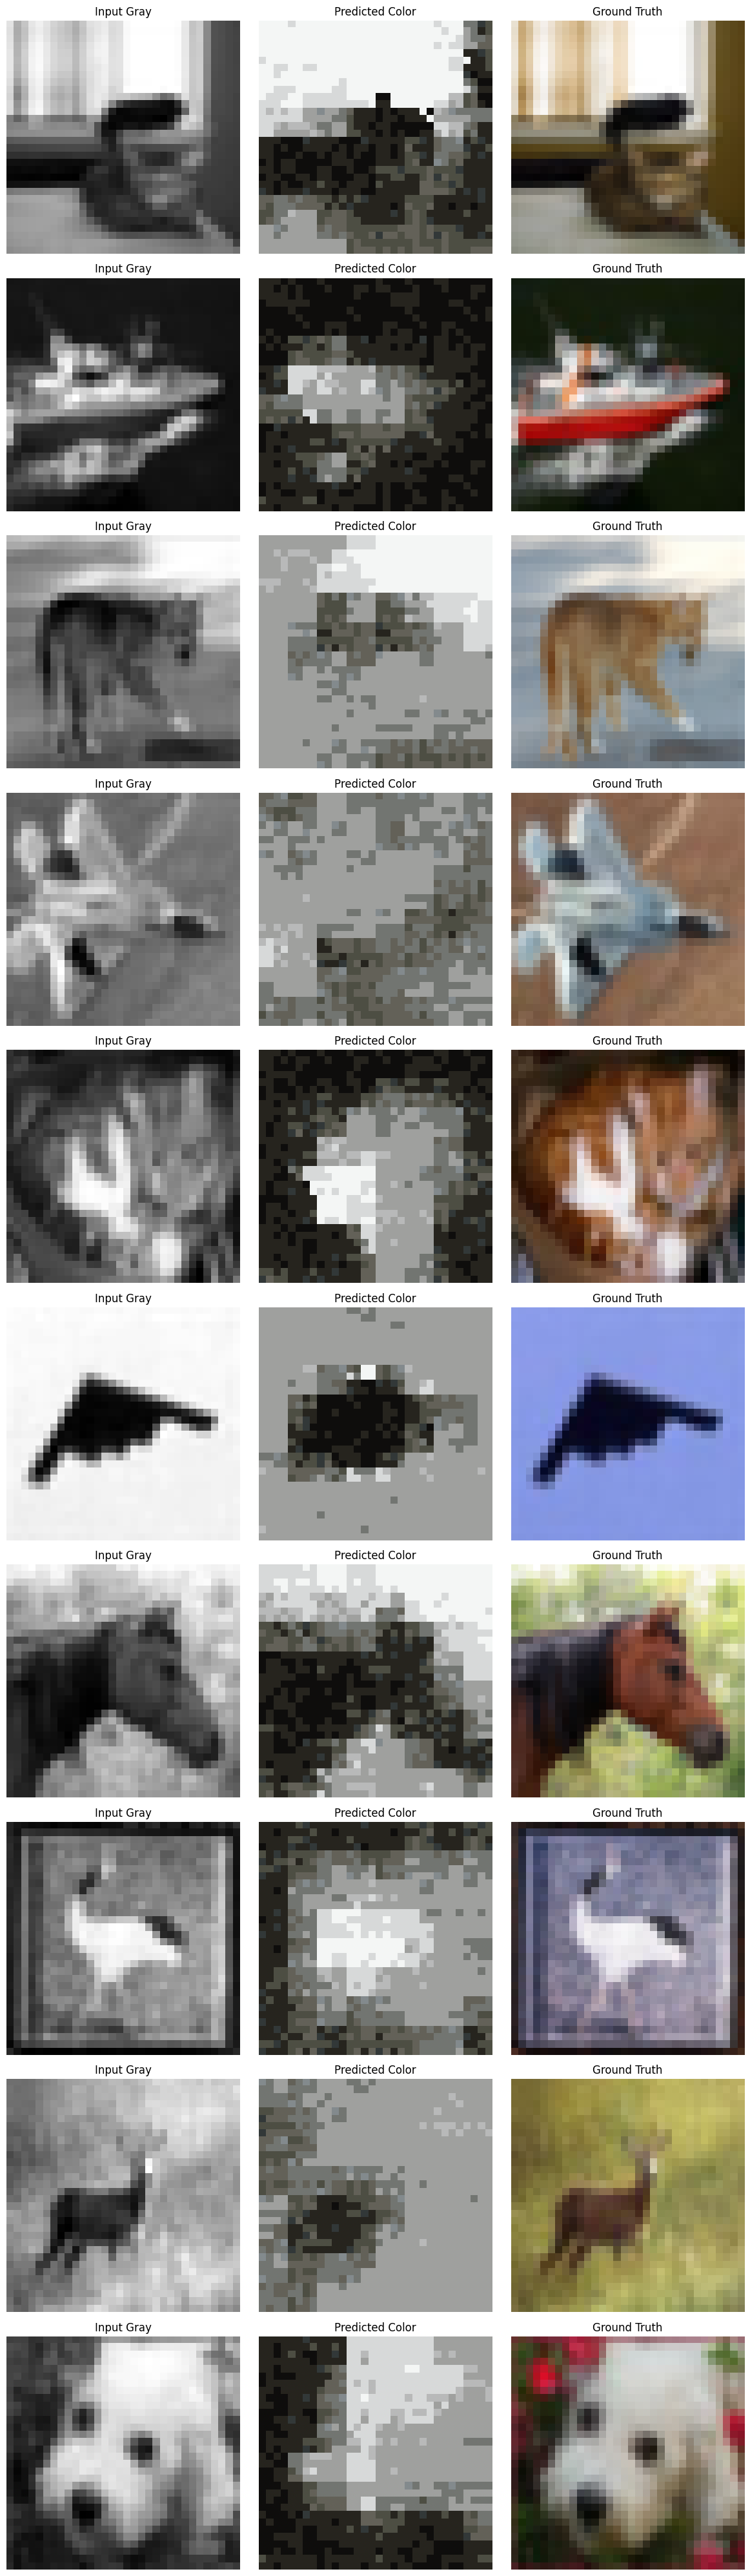

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run3_LR0.0001_BS32_NF8_K5_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.7365 | Val Loss: 2.3878
-> Saved new best model with Val Loss: 2.3878
Epoch 2/25 | Train Loss: 2.2775 | Val Loss: 2.1639
-> Saved new best model with Val Loss: 2.1639
Epoch 3/25 | Train Loss: 2.1385 | Val Loss: 2.0652
-> Saved new best model with Val Loss: 2.0652
Epoch 4/25 | Train Loss: 2.0735 | Val Loss: 2.0131
-> Saved new best model with Val Loss: 2.0131
Epoch 5/25 | Train Loss: 2.0352 | Val Loss: 1.9810
-> Saved new best model with Val Loss: 1.9810
Epoch 6/25 | Train Loss: 2.0085 | Val Loss: 1.9532
-> Saved new best model with Val Loss: 1.9532
Epoch 7/25 | Train Loss: 1.9894 | Val Loss: 1.9312
-> Saved new best model with Val Loss: 1.9312
Epoch 8/25 | Train Loss: 1.9734 | Val Loss: 1.9154
-> Saved new best model with Val Loss: 1.9154
Epoch 9/25 | Train Loss: 1.9583 | Val Loss: 1.9176
Epoch 10/25 | Train Loss: 1.9478 | Val Loss: 1.8993
-> Saved new bes

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


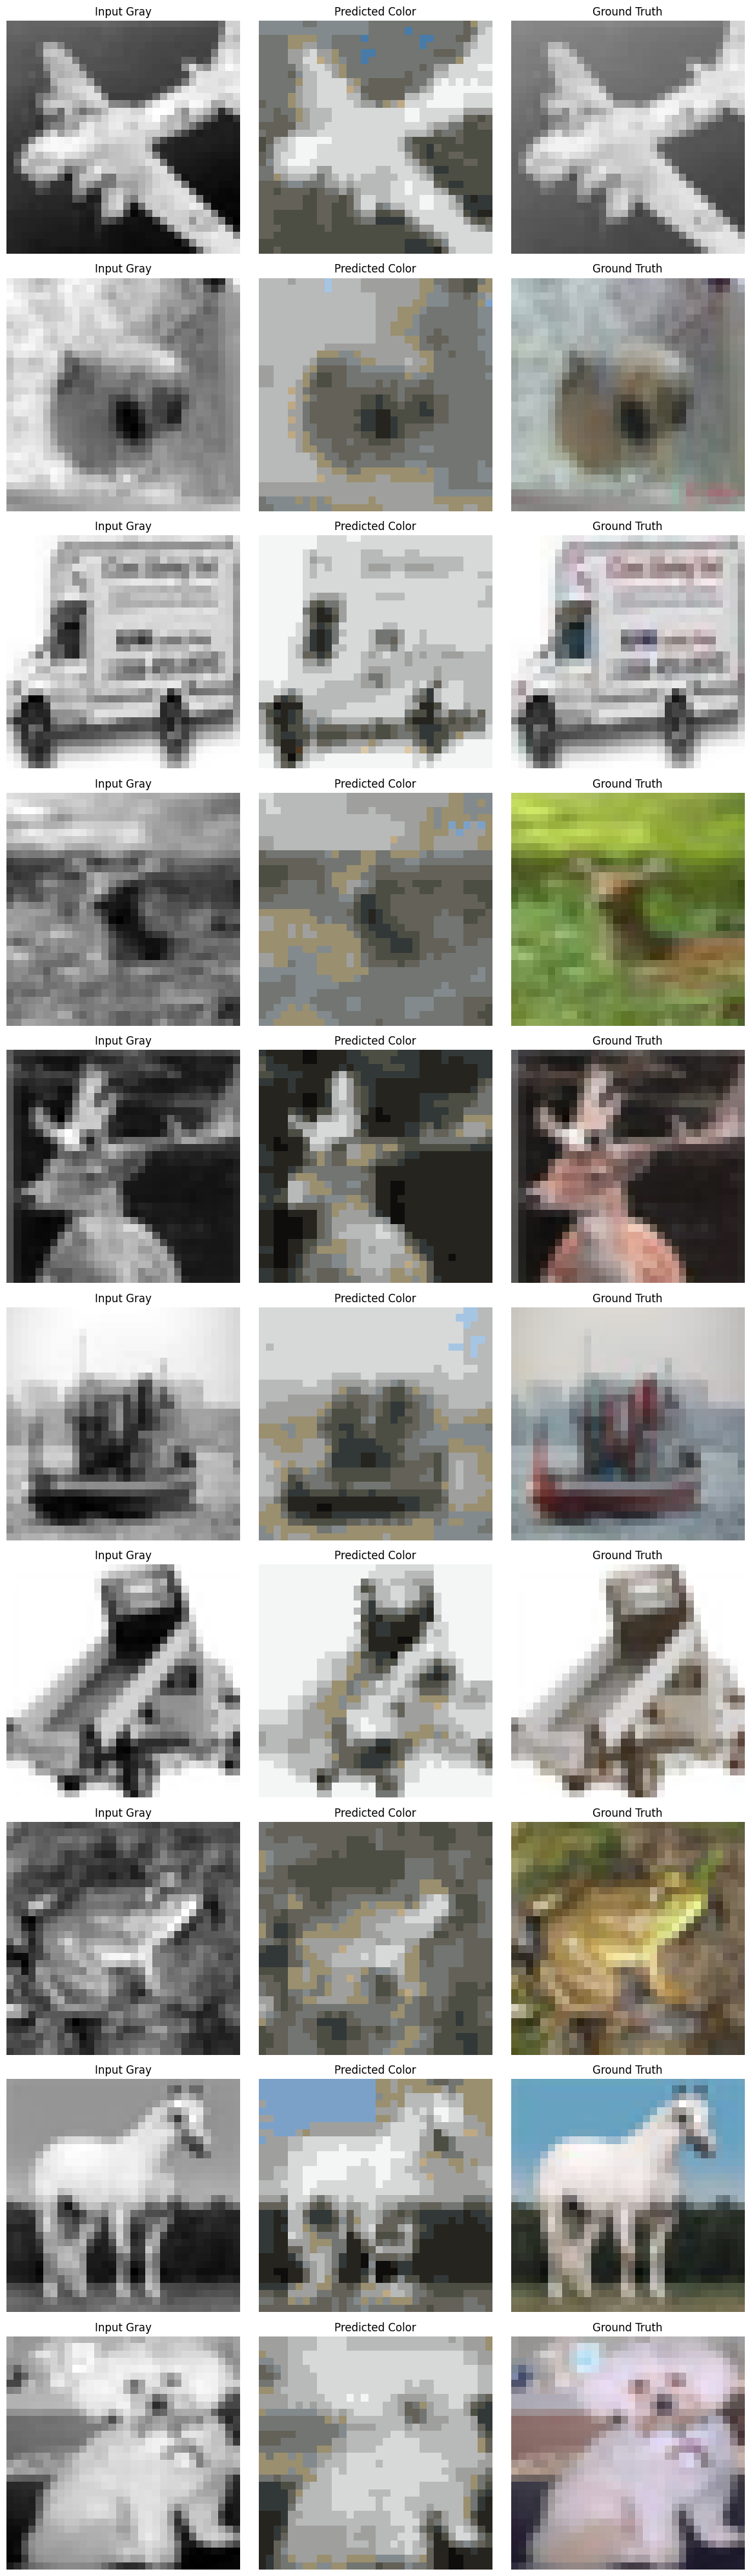

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run4_LR0.01_BS64_NF32_K5_SGD


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.3113 | Val Loss: 1.9643
-> Saved new best model with Val Loss: 1.9643
Epoch 2/25 | Train Loss: 1.8945 | Val Loss: 1.8224
-> Saved new best model with Val Loss: 1.8224
Epoch 3/25 | Train Loss: 1.7819 | Val Loss: 1.7081
-> Saved new best model with Val Loss: 1.7081
Epoch 4/25 | Train Loss: 1.7133 | Val Loss: 1.6647
-> Saved new best model with Val Loss: 1.6647
Epoch 5/25 | Train Loss: 1.6716 | Val Loss: 1.6373
-> Saved new best model with Val Loss: 1.6373
Epoch 6/25 | Train Loss: 1.6444 | Val Loss: 1.5846
-> Saved new best model with Val Loss: 1.5846
Epoch 7/25 | Train Loss: 1.6227 | Val Loss: 1.6650
Epoch 8/25 | Train Loss: 1.6020 | Val Loss: 1.5824
-> Saved new best model with Val Loss: 1.5824
Epoch 9/25 | Train Loss: 1.5915 | Val Loss: 1.6388
Epoch 10/25 | Train Loss: 1.5755 | Val Loss: 1.5573
-> Saved new best model with Val Loss: 1.5573
Epoch 11/25 | Tr

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


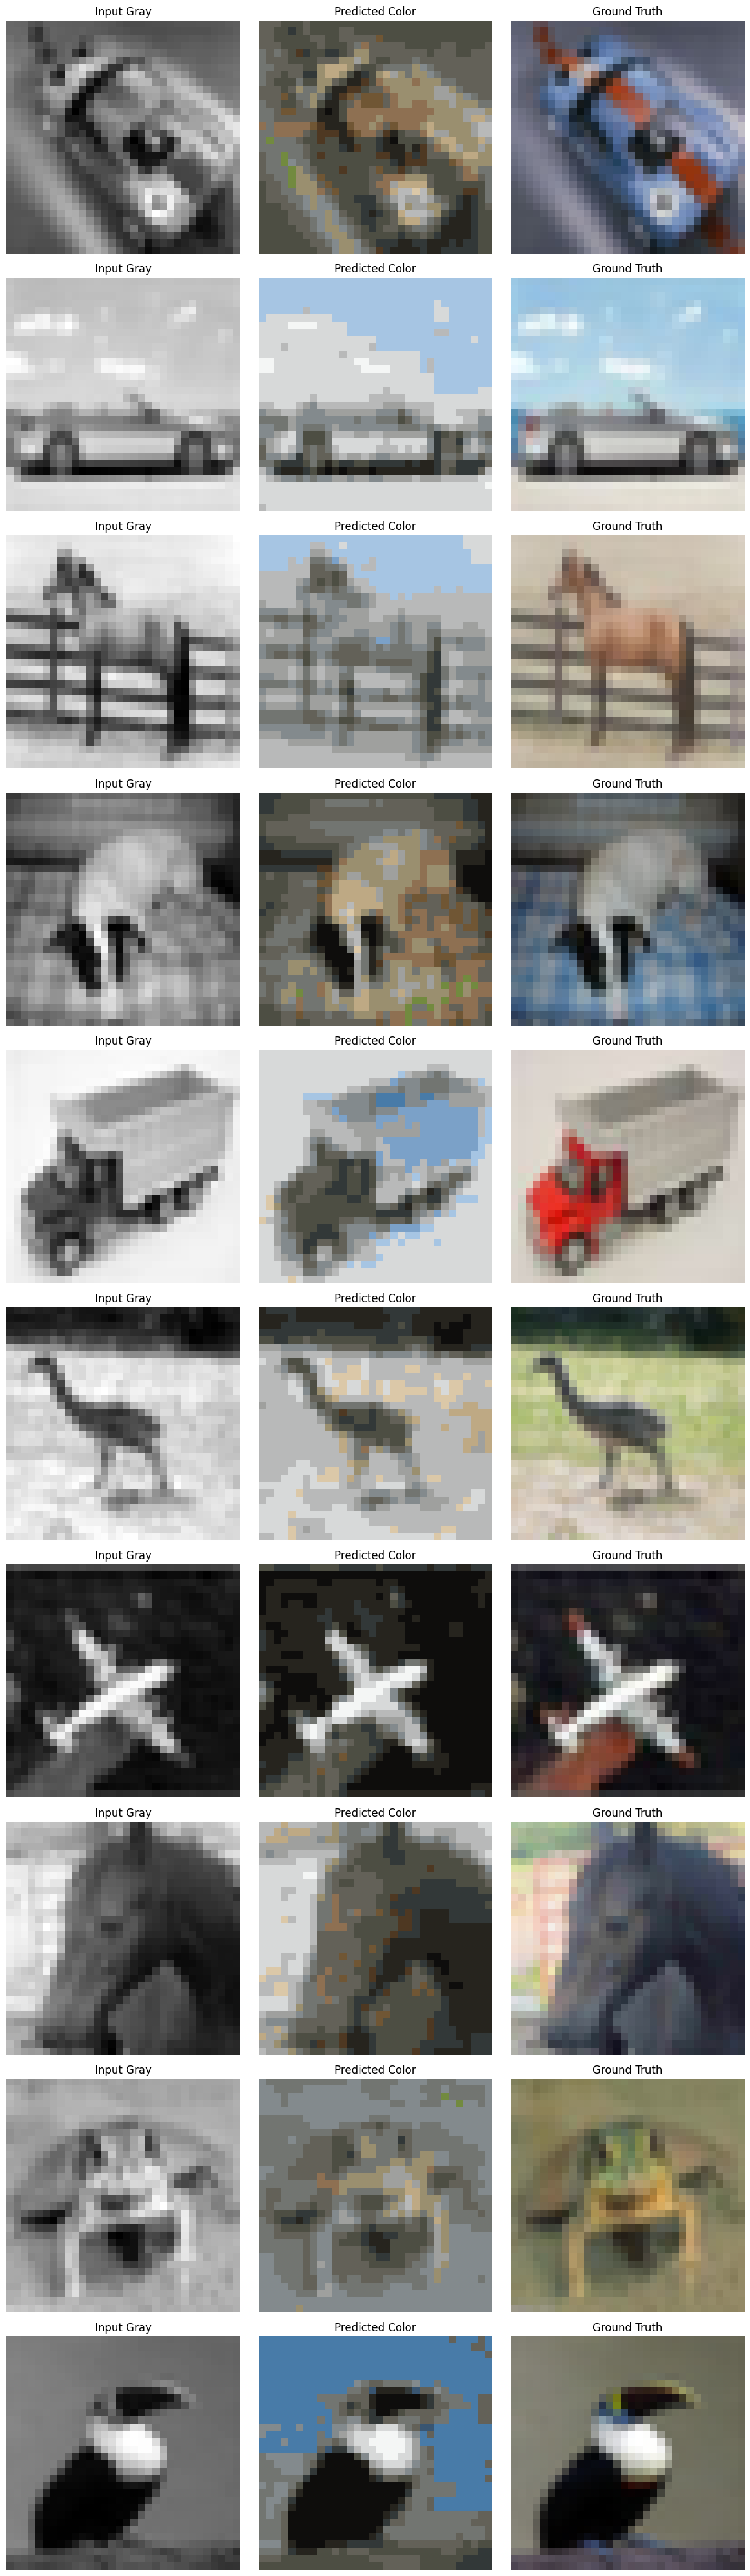

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run5_LR0.0001_BS128_NF32_K5_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.8509 | Val Loss: 2.5892
-> Saved new best model with Val Loss: 2.5892
Epoch 2/25 | Train Loss: 2.4440 | Val Loss: 2.3156
-> Saved new best model with Val Loss: 2.3156
Epoch 3/25 | Train Loss: 2.2230 | Val Loss: 2.1319
-> Saved new best model with Val Loss: 2.1319
Epoch 4/25 | Train Loss: 2.0694 | Val Loss: 2.0132
-> Saved new best model with Val Loss: 2.0132
Epoch 5/25 | Train Loss: 1.9653 | Val Loss: 1.9096
-> Saved new best model with Val Loss: 1.9096
Epoch 6/25 | Train Loss: 1.8886 | Val Loss: 1.8471
-> Saved new best model with Val Loss: 1.8471
Epoch 7/25 | Train Loss: 1.8305 | Val Loss: 1.7980
-> Saved new best model with Val Loss: 1.7980
Epoch 8/25 | Train Loss: 1.7869 | Val Loss: 1.7488
-> Saved new best model with Val Loss: 1.7488
Epoch 9/25 | Train Loss: 1.7475 | Val Loss: 1.7138
-> Saved new best model with Val Loss: 1.7138
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


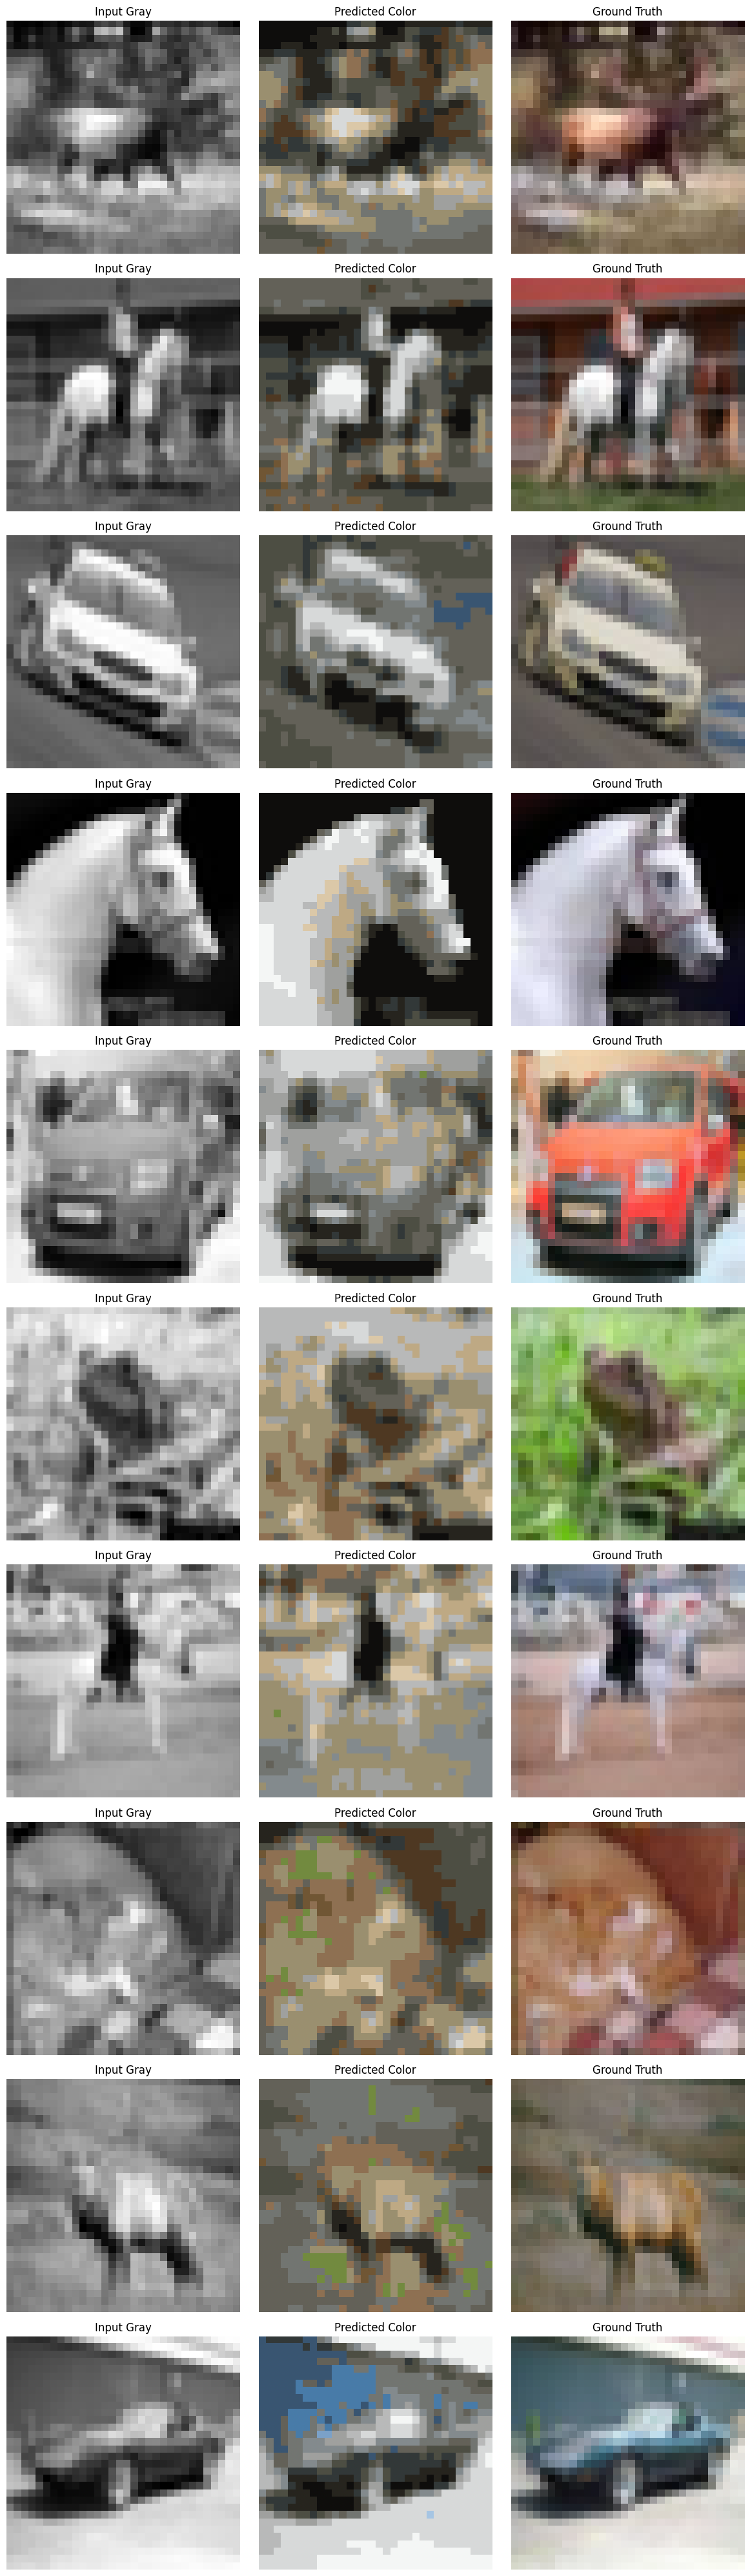

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run6_LR0.0001_BS128_NF16_K5_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.9534 | Val Loss: 2.7278
-> Saved new best model with Val Loss: 2.7278
Epoch 2/25 | Train Loss: 2.5714 | Val Loss: 2.4327
-> Saved new best model with Val Loss: 2.4327
Epoch 3/25 | Train Loss: 2.3434 | Val Loss: 2.2534
-> Saved new best model with Val Loss: 2.2534
Epoch 4/25 | Train Loss: 2.1898 | Val Loss: 2.1279
-> Saved new best model with Val Loss: 2.1279
Epoch 5/25 | Train Loss: 2.0857 | Val Loss: 2.0374
-> Saved new best model with Val Loss: 2.0374
Epoch 6/25 | Train Loss: 2.0142 | Val Loss: 1.9763
-> Saved new best model with Val Loss: 1.9763
Epoch 7/25 | Train Loss: 1.9606 | Val Loss: 1.9290
-> Saved new best model with Val Loss: 1.9290
Epoch 8/25 | Train Loss: 1.9219 | Val Loss: 1.9071
-> Saved new best model with Val Loss: 1.9071
Epoch 9/25 | Train Loss: 1.8905 | Val Loss: 1.8636
-> Saved new best model with Val Loss: 1.8636
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


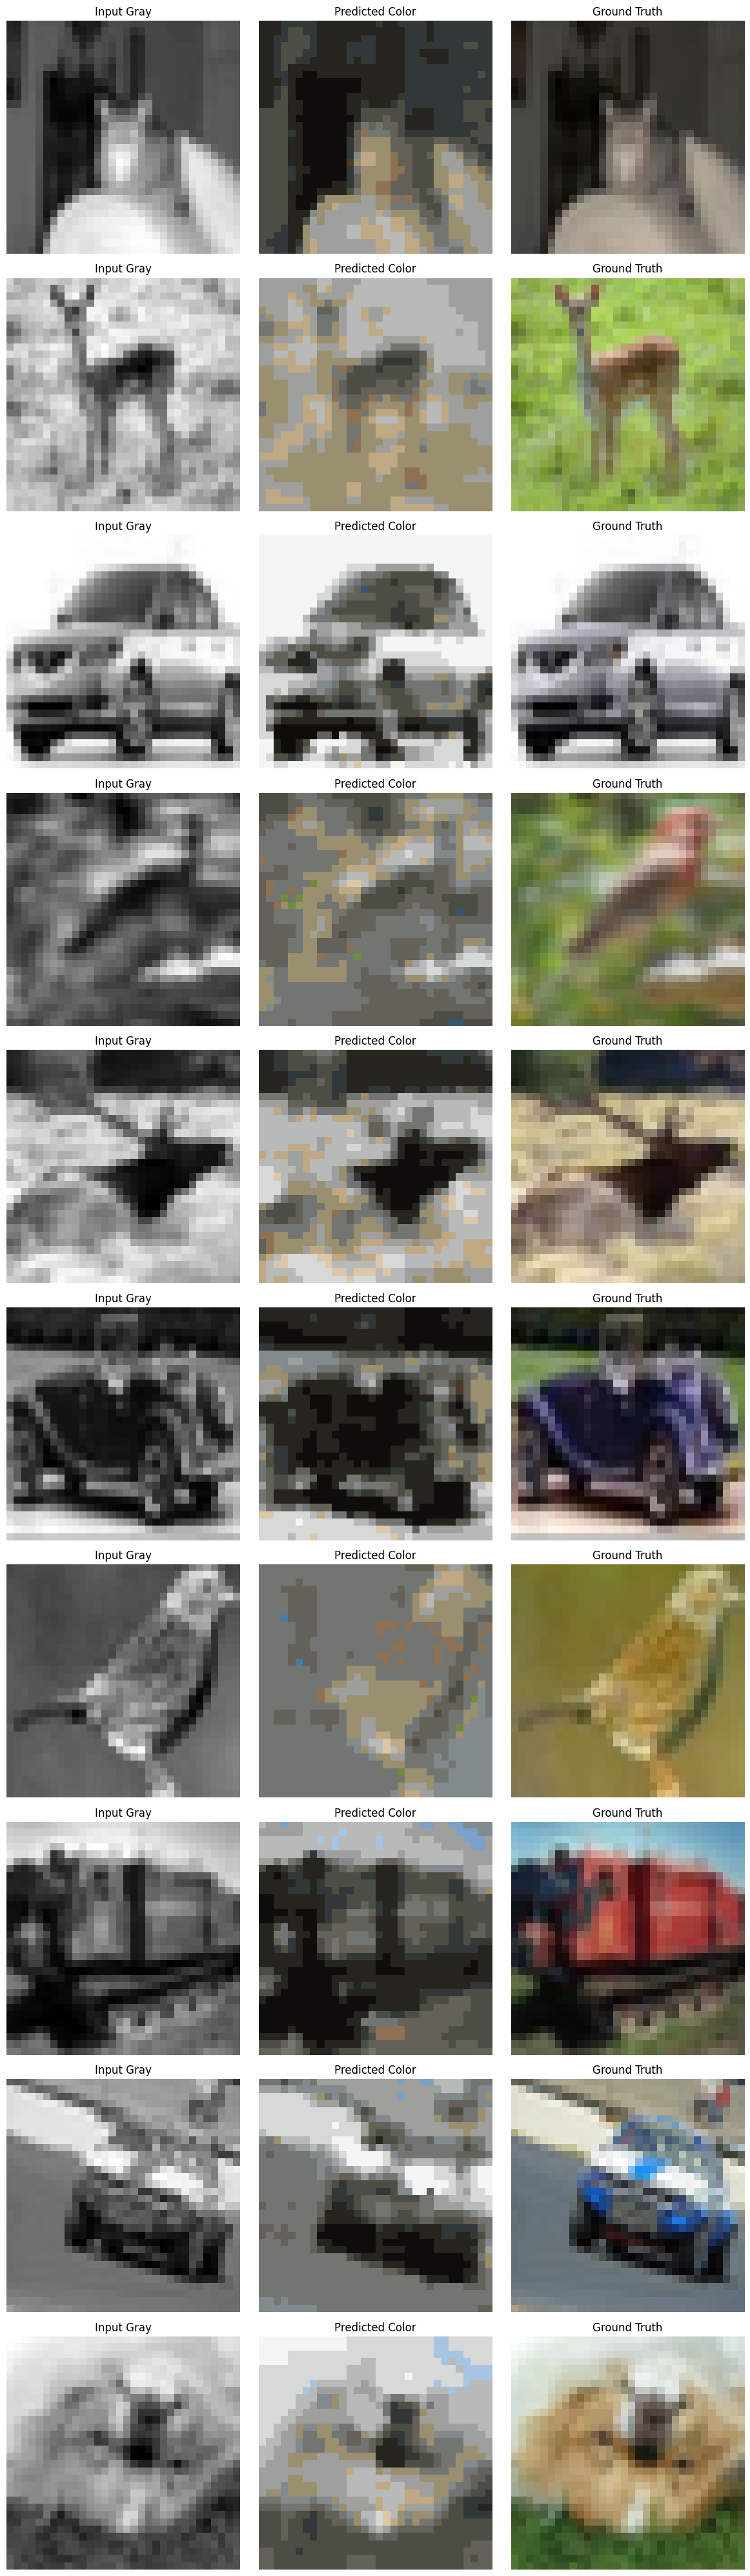

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run7_LR0.0001_BS128_NF16_K3_SGD


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 3.2339 | Val Loss: 3.2210
-> Saved new best model with Val Loss: 3.2210
Epoch 2/25 | Train Loss: 3.2057 | Val Loss: 3.1944
-> Saved new best model with Val Loss: 3.1944
Epoch 3/25 | Train Loss: 3.1798 | Val Loss: 3.1680
-> Saved new best model with Val Loss: 3.1680
Epoch 4/25 | Train Loss: 3.1546 | Val Loss: 3.1426
-> Saved new best model with Val Loss: 3.1426
Epoch 5/25 | Train Loss: 3.1292 | Val Loss: 3.1168
-> Saved new best model with Val Loss: 3.1168
Epoch 6/25 | Train Loss: 3.1036 | Val Loss: 3.0907
-> Saved new best model with Val Loss: 3.0907
Epoch 7/25 | Train Loss: 3.0780 | Val Loss: 3.0641
-> Saved new best model with Val Loss: 3.0641
Epoch 8/25 | Train Loss: 3.0529 | Val Loss: 3.0397
-> Saved new best model with Val Loss: 3.0397
Epoch 9/25 | Train Loss: 3.0292 | Val Loss: 3.0163
-> Saved new best model with Val Loss: 3.0163
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


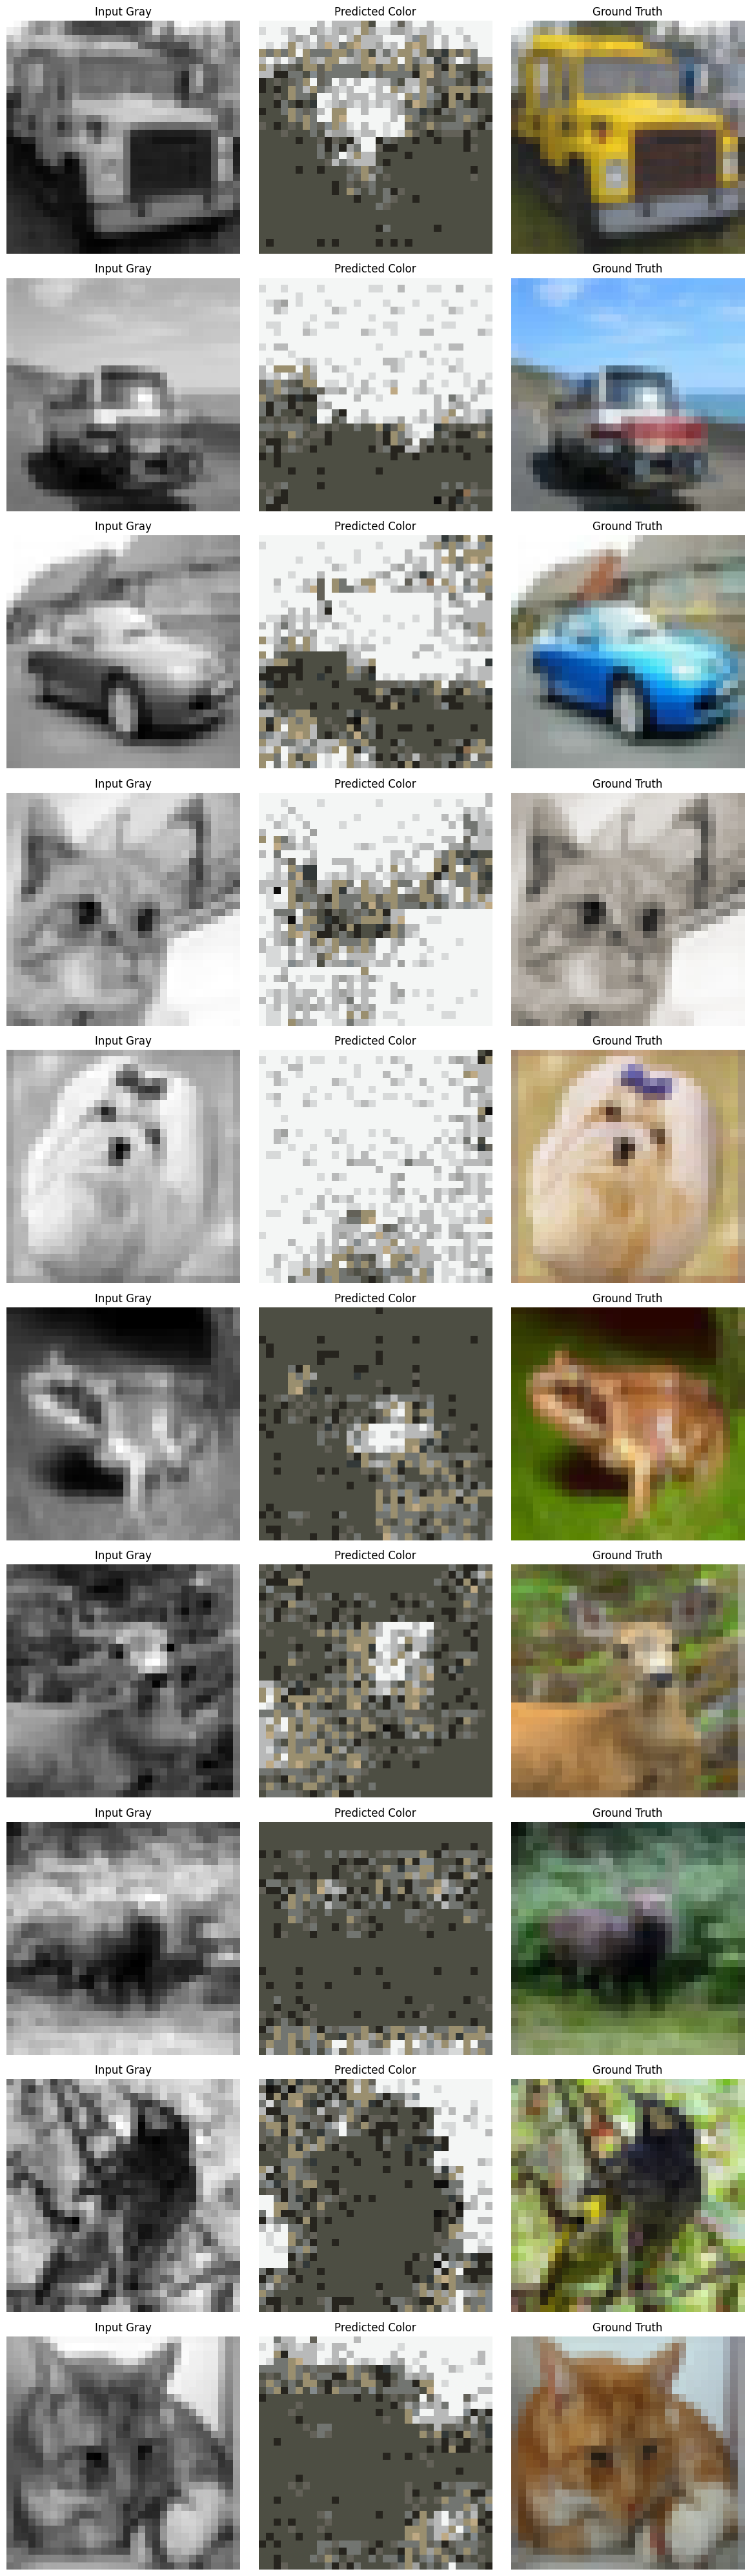

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run8_LR0.0001_BS64_NF16_K3_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.7647 | Val Loss: 2.4707
-> Saved new best model with Val Loss: 2.4707
Epoch 2/25 | Train Loss: 2.3202 | Val Loss: 2.2073
-> Saved new best model with Val Loss: 2.2073
Epoch 3/25 | Train Loss: 2.1540 | Val Loss: 2.0905
-> Saved new best model with Val Loss: 2.0905
Epoch 4/25 | Train Loss: 2.0740 | Val Loss: 2.0235
-> Saved new best model with Val Loss: 2.0235
Epoch 5/25 | Train Loss: 2.0280 | Val Loss: 1.9843
-> Saved new best model with Val Loss: 1.9843
Epoch 6/25 | Train Loss: 1.9983 | Val Loss: 1.9601
-> Saved new best model with Val Loss: 1.9601
Epoch 7/25 | Train Loss: 1.9752 | Val Loss: 1.9361
-> Saved new best model with Val Loss: 1.9361
Epoch 8/25 | Train Loss: 1.9597 | Val Loss: 1.9265
-> Saved new best model with Val Loss: 1.9265
Epoch 9/25 | Train Loss: 1.9453 | Val Loss: 1.9096
-> Saved new best model with Val Loss: 1.9096
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


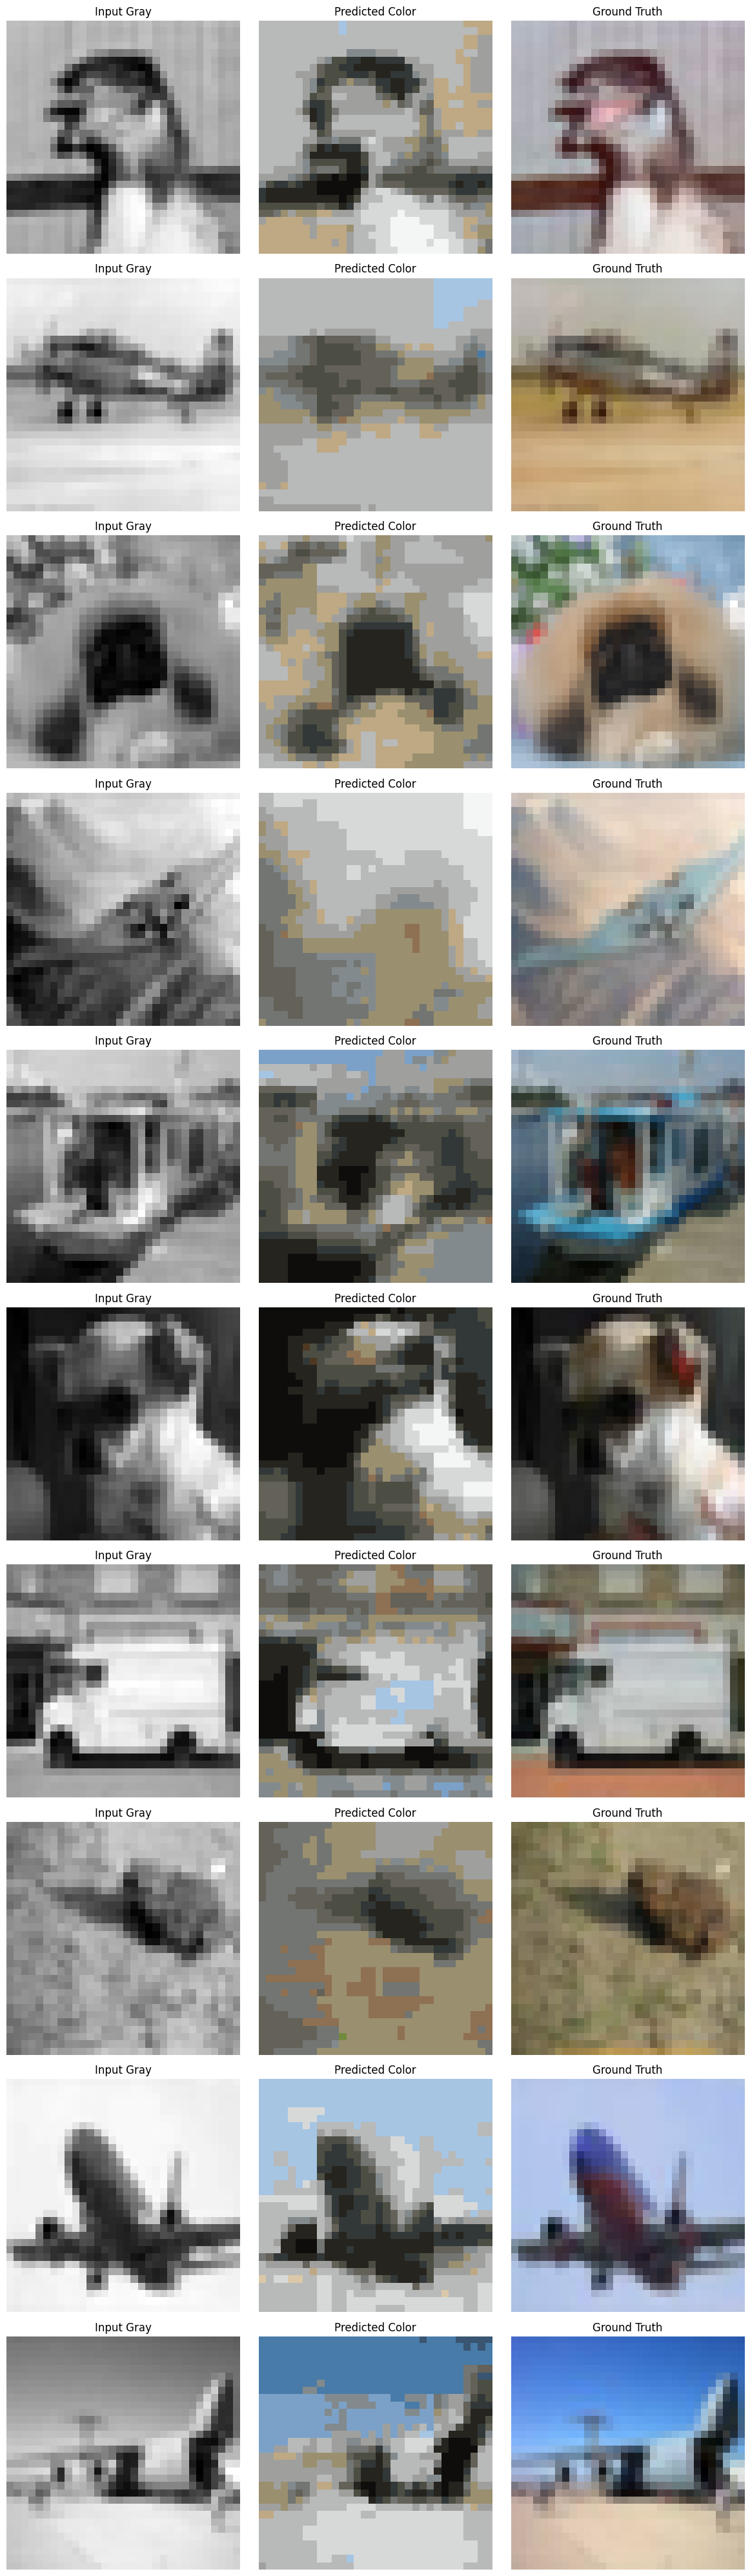

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run9_LR0.0001_BS64_NF8_K3_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.8718 | Val Loss: 2.5960
-> Saved new best model with Val Loss: 2.5960
Epoch 2/25 | Train Loss: 2.4622 | Val Loss: 2.3448
-> Saved new best model with Val Loss: 2.3448
Epoch 3/25 | Train Loss: 2.2829 | Val Loss: 2.2200
-> Saved new best model with Val Loss: 2.2200
Epoch 4/25 | Train Loss: 2.1960 | Val Loss: 2.1581
-> Saved new best model with Val Loss: 2.1581
Epoch 5/25 | Train Loss: 2.1518 | Val Loss: 2.1160
-> Saved new best model with Val Loss: 2.1160
Epoch 6/25 | Train Loss: 2.1238 | Val Loss: 2.0911
-> Saved new best model with Val Loss: 2.0911
Epoch 7/25 | Train Loss: 2.1016 | Val Loss: 2.0712
-> Saved new best model with Val Loss: 2.0712
Epoch 8/25 | Train Loss: 2.0855 | Val Loss: 2.0567
-> Saved new best model with Val Loss: 2.0567
Epoch 9/25 | Train Loss: 2.0741 | Val Loss: 2.0427
-> Saved new best model with Val Loss: 2.0427
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


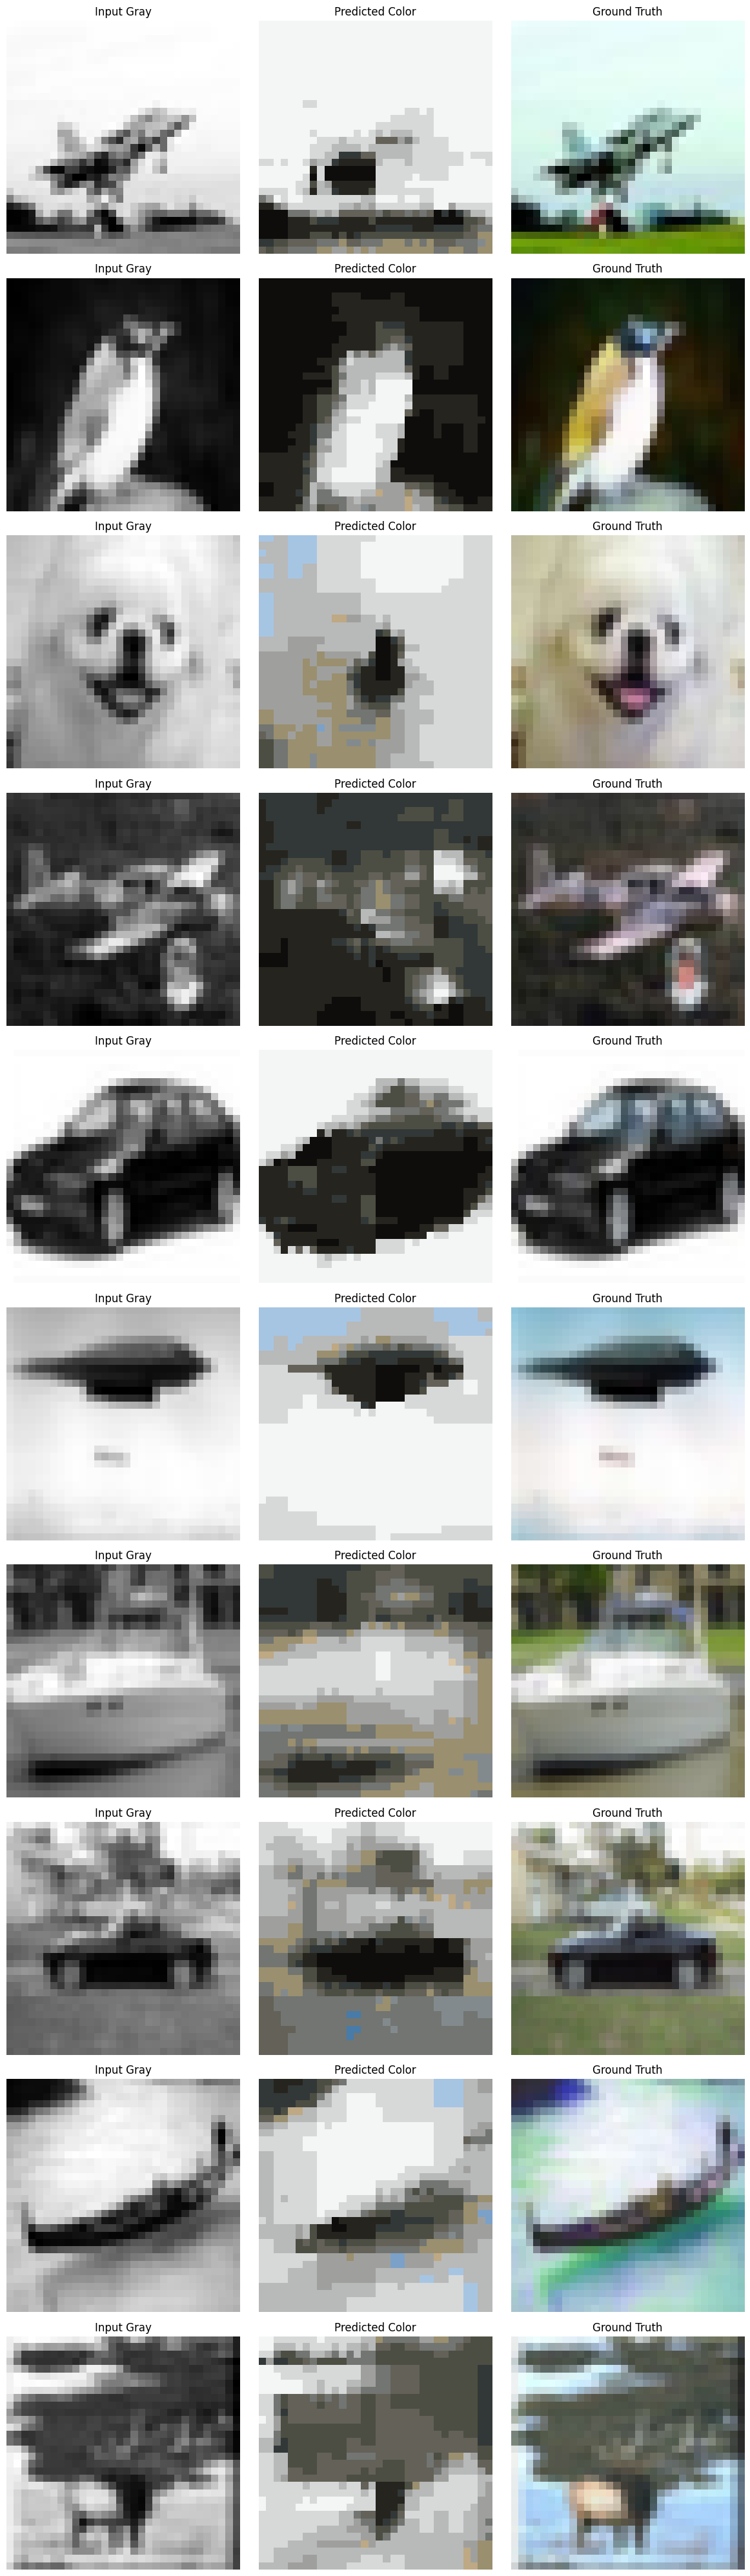

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run10_LR0.01_BS64_NF8_K5_SGD


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.5484 | Val Loss: 2.2128
-> Saved new best model with Val Loss: 2.2128
Epoch 2/25 | Train Loss: 2.1058 | Val Loss: 2.0122
-> Saved new best model with Val Loss: 2.0122
Epoch 3/25 | Train Loss: 1.9899 | Val Loss: 1.9225
-> Saved new best model with Val Loss: 1.9225
Epoch 4/25 | Train Loss: 1.9363 | Val Loss: 1.9450
Epoch 5/25 | Train Loss: 1.9072 | Val Loss: 1.9119
-> Saved new best model with Val Loss: 1.9119
Epoch 6/25 | Train Loss: 1.8789 | Val Loss: 1.8721
-> Saved new best model with Val Loss: 1.8721
Epoch 7/25 | Train Loss: 1.8656 | Val Loss: 1.8764
Epoch 8/25 | Train Loss: 1.8509 | Val Loss: 1.8115
-> Saved new best model with Val Loss: 1.8115
Epoch 9/25 | Train Loss: 1.8344 | Val Loss: 1.8294
Epoch 10/25 | Train Loss: 1.8254 | Val Loss: 1.8041
-> Saved new best model with Val Loss: 1.8041
Epoch 11/25 | Train Loss: 1.8108 | Val Loss: 1.7836
-> Saved n

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


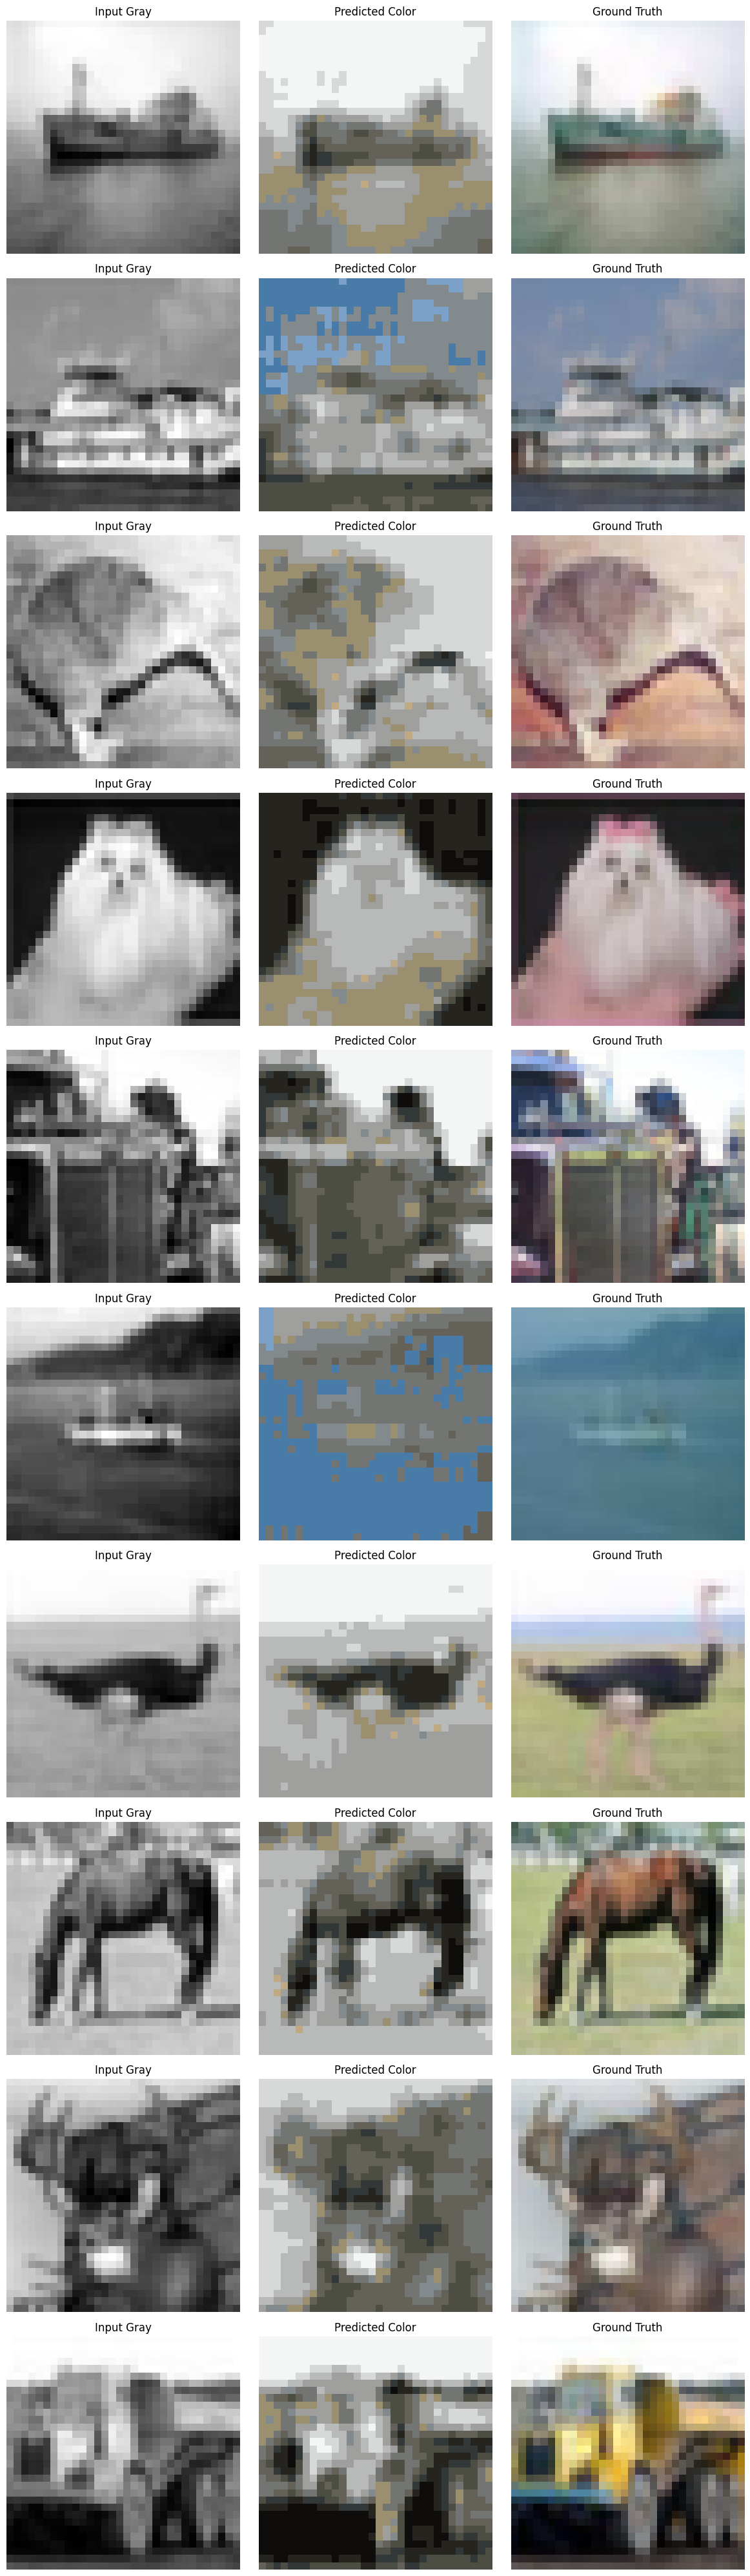

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run11_LR0.001_BS128_NF32_K3_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.2319 | Val Loss: 1.8957
-> Saved new best model with Val Loss: 1.8957
Epoch 2/25 | Train Loss: 1.8529 | Val Loss: 1.8000
-> Saved new best model with Val Loss: 1.8000
Epoch 3/25 | Train Loss: 1.7880 | Val Loss: 1.7775
-> Saved new best model with Val Loss: 1.7775
Epoch 4/25 | Train Loss: 1.7598 | Val Loss: 1.7457
-> Saved new best model with Val Loss: 1.7457
Epoch 5/25 | Train Loss: 1.7411 | Val Loss: 1.7210
-> Saved new best model with Val Loss: 1.7210
Epoch 6/25 | Train Loss: 1.7267 | Val Loss: 1.7118
-> Saved new best model with Val Loss: 1.7118
Epoch 7/25 | Train Loss: 1.7152 | Val Loss: 1.7189
Epoch 8/25 | Train Loss: 1.7111 | Val Loss: 1.7097
-> Saved new best model with Val Loss: 1.7097
Epoch 9/25 | Train Loss: 1.6964 | Val Loss: 1.6794
-> Saved new best model with Val Loss: 1.6794
Epoch 10/25 | Train Loss: 1.6873 | Val Loss: 1.6677
-> Saved new bes

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


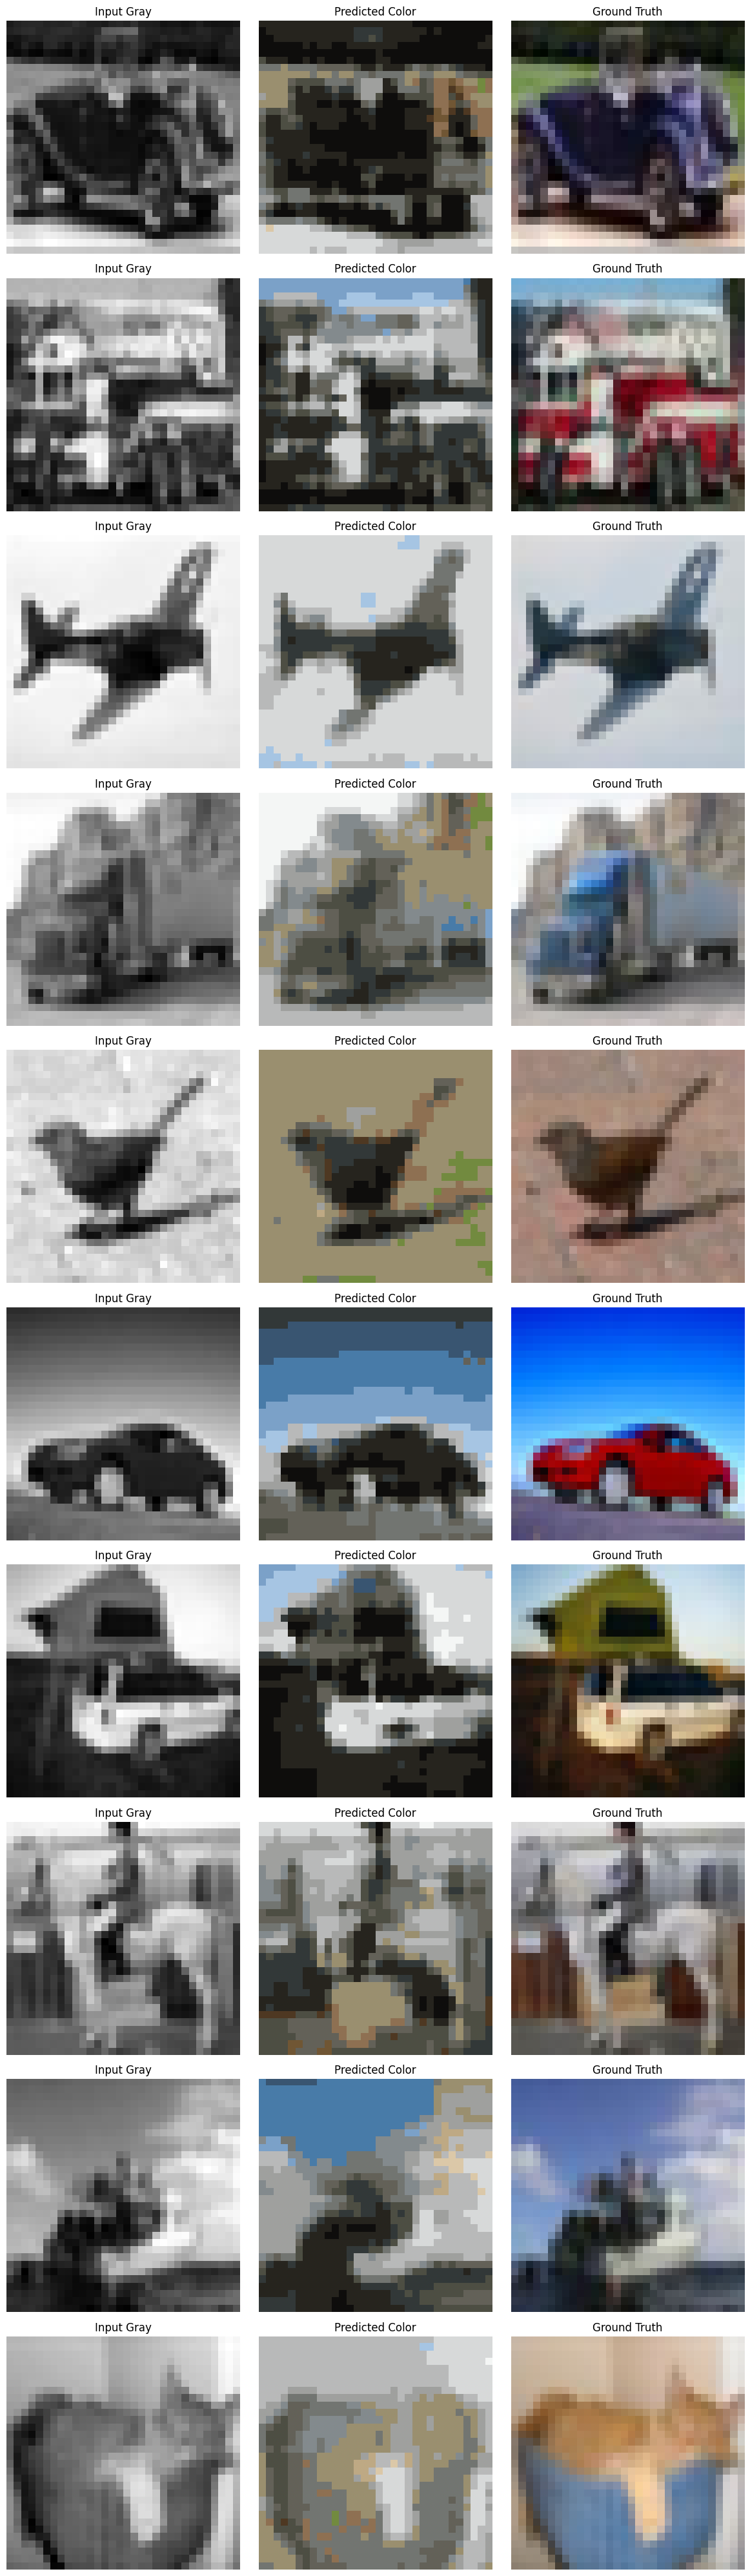

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run12_LR0.0001_BS32_NF32_K5_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.5015 | Val Loss: 2.1341
-> Saved new best model with Val Loss: 2.1341
Epoch 2/25 | Train Loss: 2.0171 | Val Loss: 1.8858
-> Saved new best model with Val Loss: 1.8858
Epoch 3/25 | Train Loss: 1.8627 | Val Loss: 1.7682
-> Saved new best model with Val Loss: 1.7682
Epoch 4/25 | Train Loss: 1.7887 | Val Loss: 1.6931
-> Saved new best model with Val Loss: 1.6931
Epoch 5/25 | Train Loss: 1.7386 | Val Loss: 1.6664
-> Saved new best model with Val Loss: 1.6664
Epoch 6/25 | Train Loss: 1.7128 | Val Loss: 1.6394
-> Saved new best model with Val Loss: 1.6394
Epoch 7/25 | Train Loss: 1.6860 | Val Loss: 1.6332
-> Saved new best model with Val Loss: 1.6332
Epoch 8/25 | Train Loss: 1.6669 | Val Loss: 1.5937
-> Saved new best model with Val Loss: 1.5937
Epoch 9/25 | Train Loss: 1.6529 | Val Loss: 1.6020
Epoch 10/25 | Train Loss: 1.6385 | Val Loss: 1.5768
-> Saved new bes

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


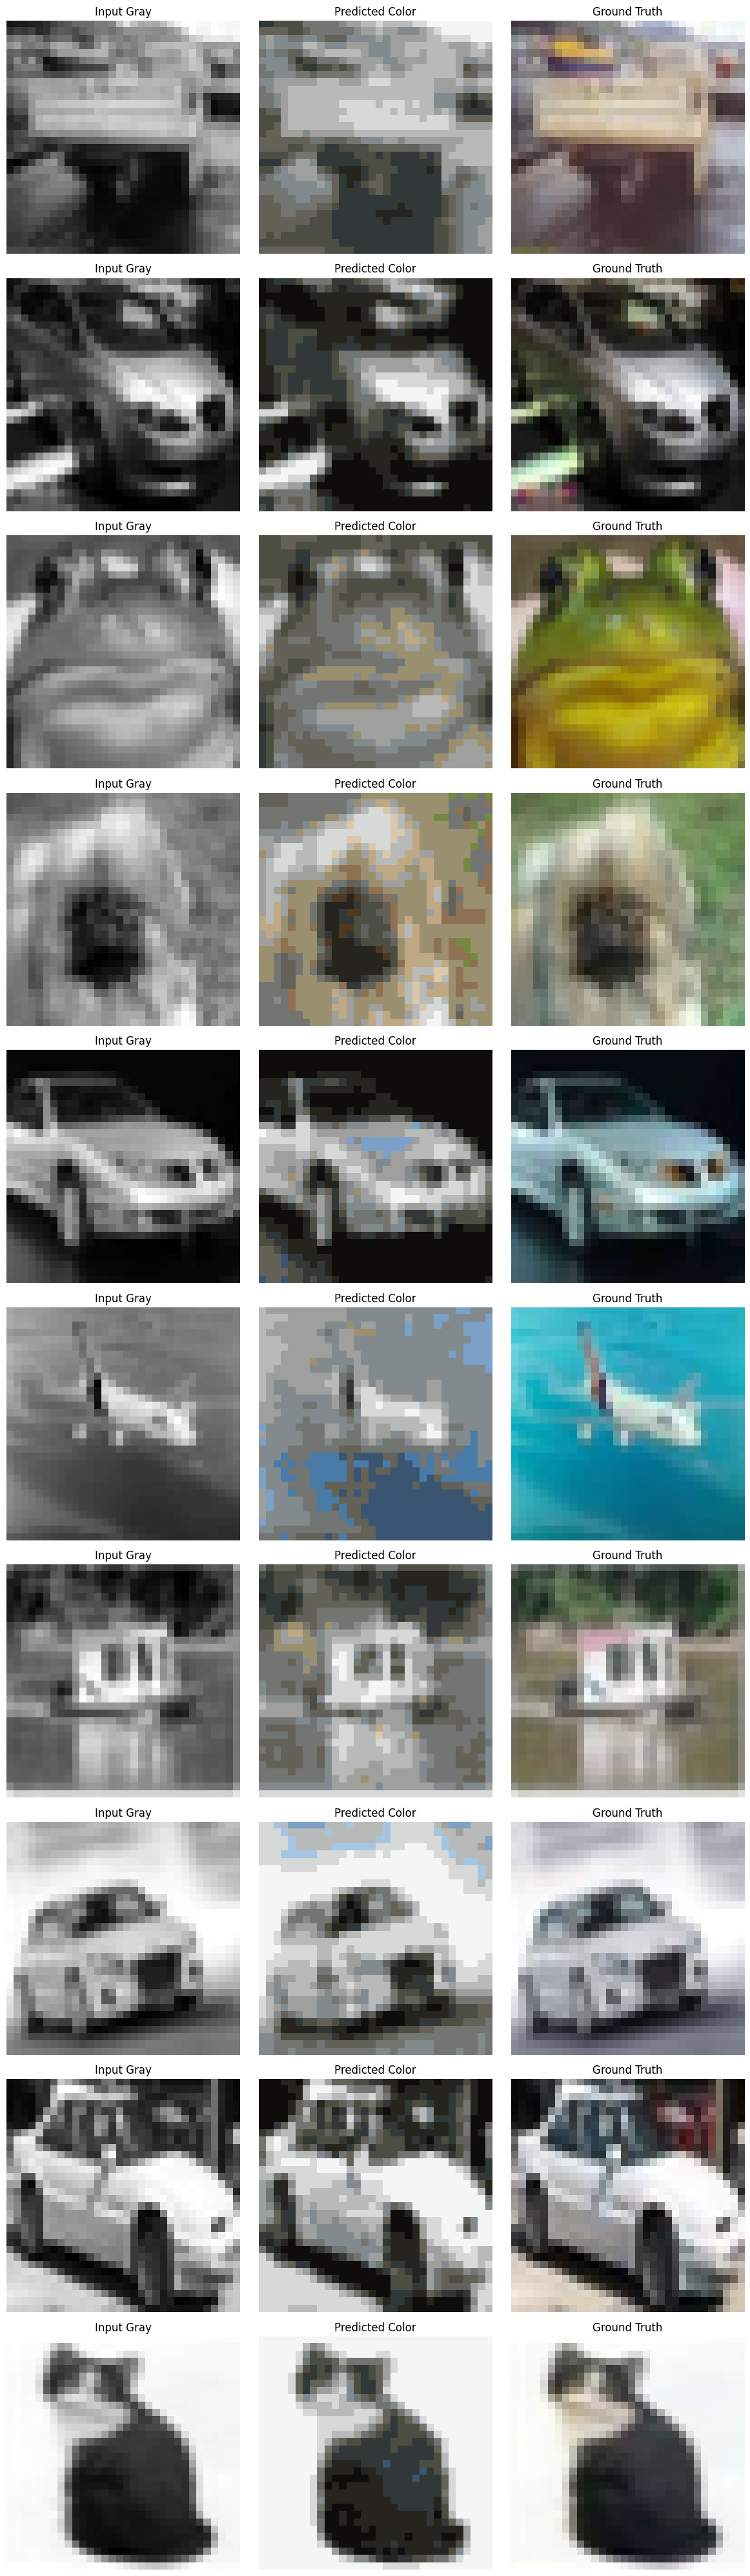

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run13_LR0.01_BS32_NF8_K5_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.0391 | Val Loss: 1.8688
-> Saved new best model with Val Loss: 1.8688
Epoch 2/25 | Train Loss: 1.8834 | Val Loss: 1.8140
-> Saved new best model with Val Loss: 1.8140
Epoch 3/25 | Train Loss: 1.8388 | Val Loss: 1.7612
-> Saved new best model with Val Loss: 1.7612
Epoch 4/25 | Train Loss: 1.8007 | Val Loss: 1.8104
Epoch 5/25 | Train Loss: 1.7837 | Val Loss: 1.7587
-> Saved new best model with Val Loss: 1.7587
Epoch 6/25 | Train Loss: 1.7554 | Val Loss: 1.7548
-> Saved new best model with Val Loss: 1.7548
Epoch 7/25 | Train Loss: 1.7466 | Val Loss: 1.7509
-> Saved new best model with Val Loss: 1.7509
Epoch 8/25 | Train Loss: 1.7362 | Val Loss: 1.7773
Epoch 9/25 | Train Loss: 1.7241 | Val Loss: 1.7039
-> Saved new best model with Val Loss: 1.7039
Epoch 10/25 | Train Loss: 1.7219 | Val Loss: 1.7009
-> Saved new best model with Val Loss: 1.7009
Epoch 11/25 | Tr

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


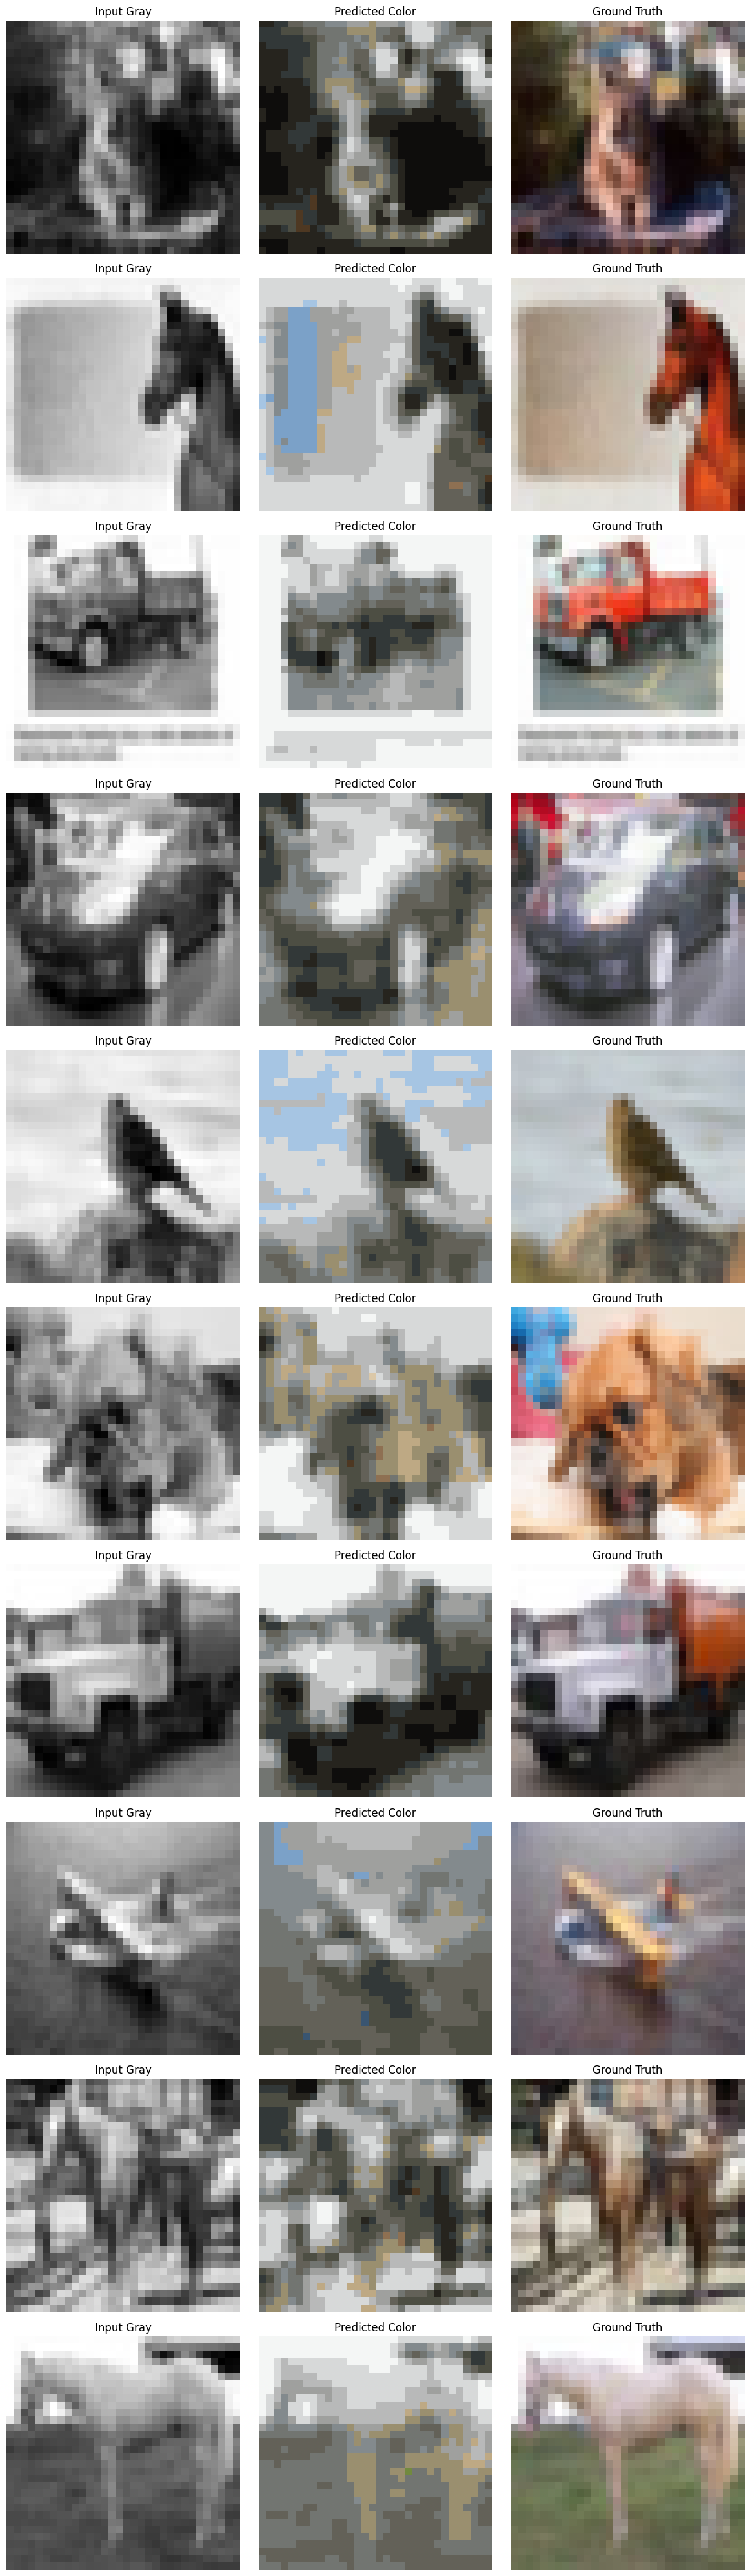

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run14_LR0.001_BS64_NF16_K5_SGD


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 3.0842 | Val Loss: 2.8692
-> Saved new best model with Val Loss: 2.8692
Epoch 2/25 | Train Loss: 2.7199 | Val Loss: 2.5956
-> Saved new best model with Val Loss: 2.5956
Epoch 3/25 | Train Loss: 2.5048 | Val Loss: 2.4215
-> Saved new best model with Val Loss: 2.4215
Epoch 4/25 | Train Loss: 2.3637 | Val Loss: 2.3032
-> Saved new best model with Val Loss: 2.3032
Epoch 5/25 | Train Loss: 2.2676 | Val Loss: 2.2179
-> Saved new best model with Val Loss: 2.2179
Epoch 6/25 | Train Loss: 2.1952 | Val Loss: 2.1507
-> Saved new best model with Val Loss: 2.1507
Epoch 7/25 | Train Loss: 2.1413 | Val Loss: 2.1026
-> Saved new best model with Val Loss: 2.1026
Epoch 8/25 | Train Loss: 2.0973 | Val Loss: 2.0777
-> Saved new best model with Val Loss: 2.0777
Epoch 9/25 | Train Loss: 2.0624 | Val Loss: 2.0367
-> Saved new best model with Val Loss: 2.0367
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


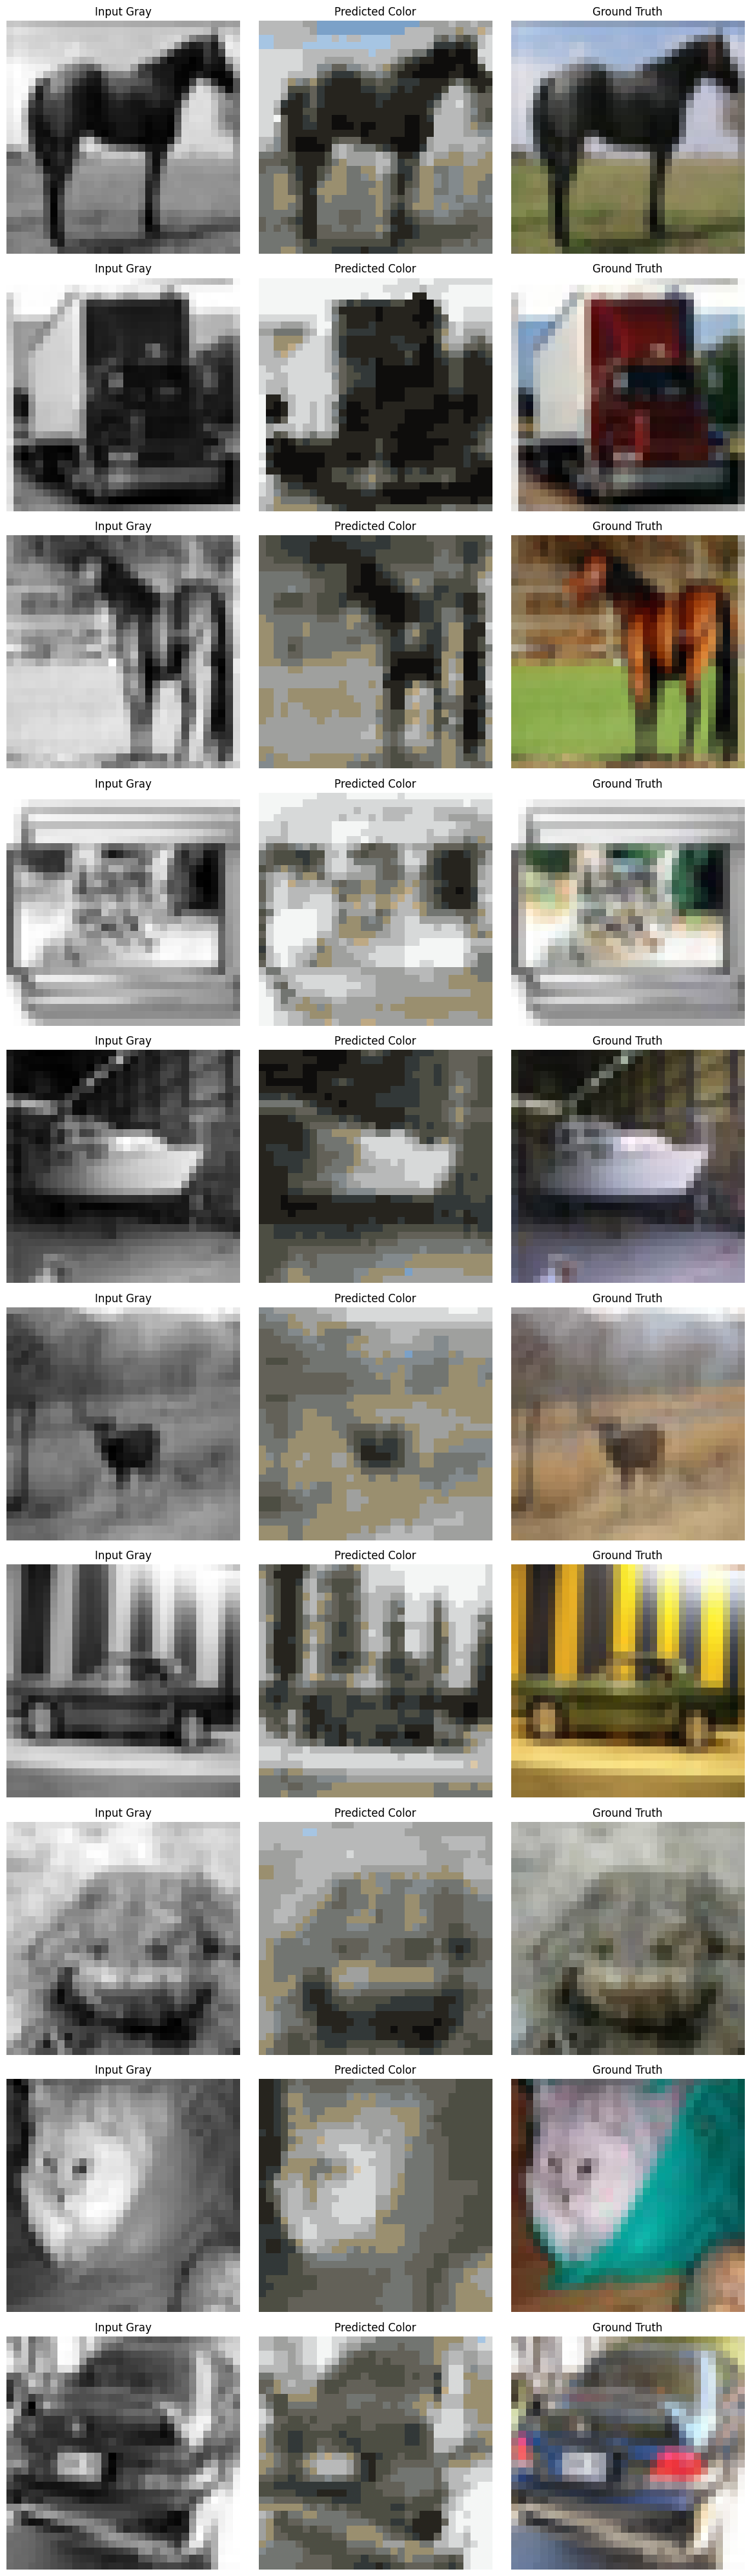

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run15_LR0.0001_BS32_NF16_K3_SGD


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 3.2132 | Val Loss: 3.1627
-> Saved new best model with Val Loss: 3.1627
Epoch 2/25 | Train Loss: 3.1147 | Val Loss: 3.0681
-> Saved new best model with Val Loss: 3.0681
Epoch 3/25 | Train Loss: 3.0227 | Val Loss: 2.9782
-> Saved new best model with Val Loss: 2.9782
Epoch 4/25 | Train Loss: 2.9360 | Val Loss: 2.8906
-> Saved new best model with Val Loss: 2.8906
Epoch 5/25 | Train Loss: 2.8531 | Val Loss: 2.8098
-> Saved new best model with Val Loss: 2.8098
Epoch 6/25 | Train Loss: 2.7801 | Val Loss: 2.7442
-> Saved new best model with Val Loss: 2.7442
Epoch 7/25 | Train Loss: 2.7207 | Val Loss: 2.6883
-> Saved new best model with Val Loss: 2.6883
Epoch 8/25 | Train Loss: 2.6707 | Val Loss: 2.6437
-> Saved new best model with Val Loss: 2.6437
Epoch 9/25 | Train Loss: 2.6278 | Val Loss: 2.6008
-> Saved new best model with Val Loss: 2.6008
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


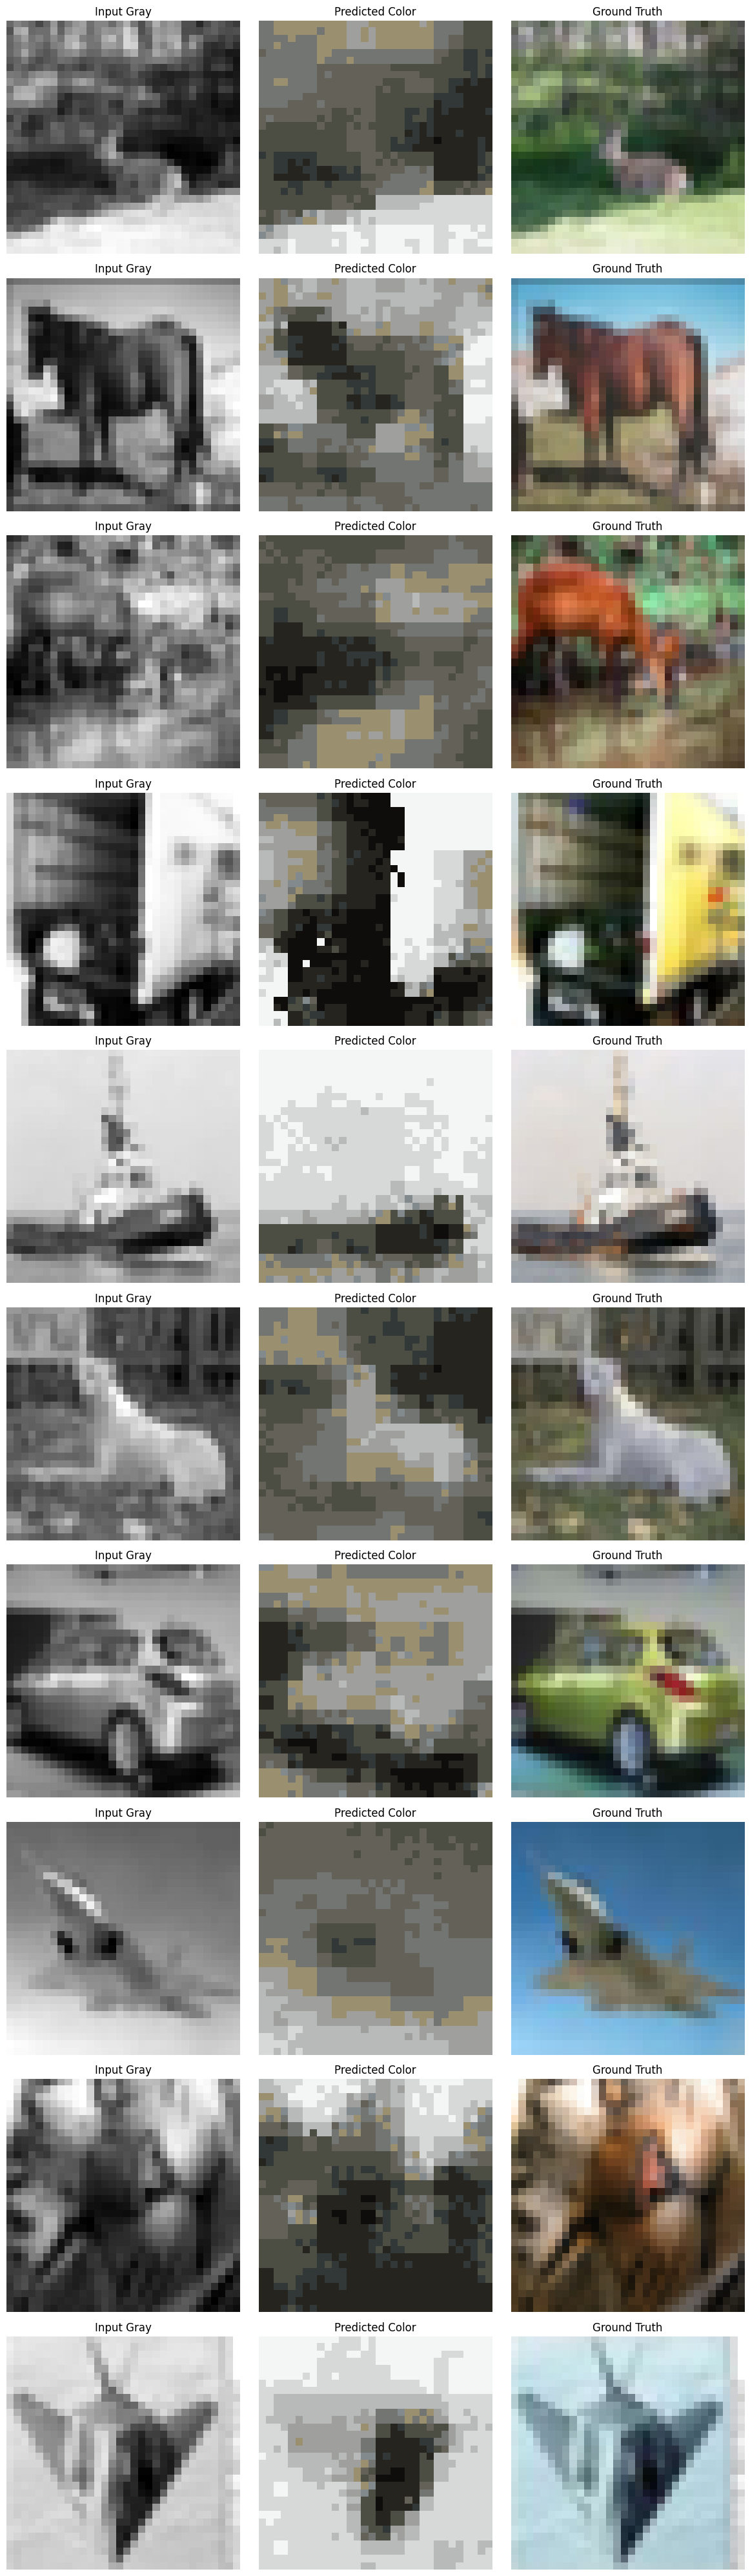

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run16_LR0.0001_BS128_NF8_K5_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 3.0500 | Val Loss: 2.9022
-> Saved new best model with Val Loss: 2.9022
Epoch 2/25 | Train Loss: 2.7578 | Val Loss: 2.6252
-> Saved new best model with Val Loss: 2.6252
Epoch 3/25 | Train Loss: 2.5354 | Val Loss: 2.4584
-> Saved new best model with Val Loss: 2.4584
Epoch 4/25 | Train Loss: 2.3944 | Val Loss: 2.3307
-> Saved new best model with Val Loss: 2.3307
Epoch 5/25 | Train Loss: 2.2875 | Val Loss: 2.2361
-> Saved new best model with Val Loss: 2.2361
Epoch 6/25 | Train Loss: 2.2058 | Val Loss: 2.1630
-> Saved new best model with Val Loss: 2.1630
Epoch 7/25 | Train Loss: 2.1404 | Val Loss: 2.1030
-> Saved new best model with Val Loss: 2.1030
Epoch 8/25 | Train Loss: 2.0895 | Val Loss: 2.0568
-> Saved new best model with Val Loss: 2.0568
Epoch 9/25 | Train Loss: 2.0473 | Val Loss: 2.0212
-> Saved new best model with Val Loss: 2.0212
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


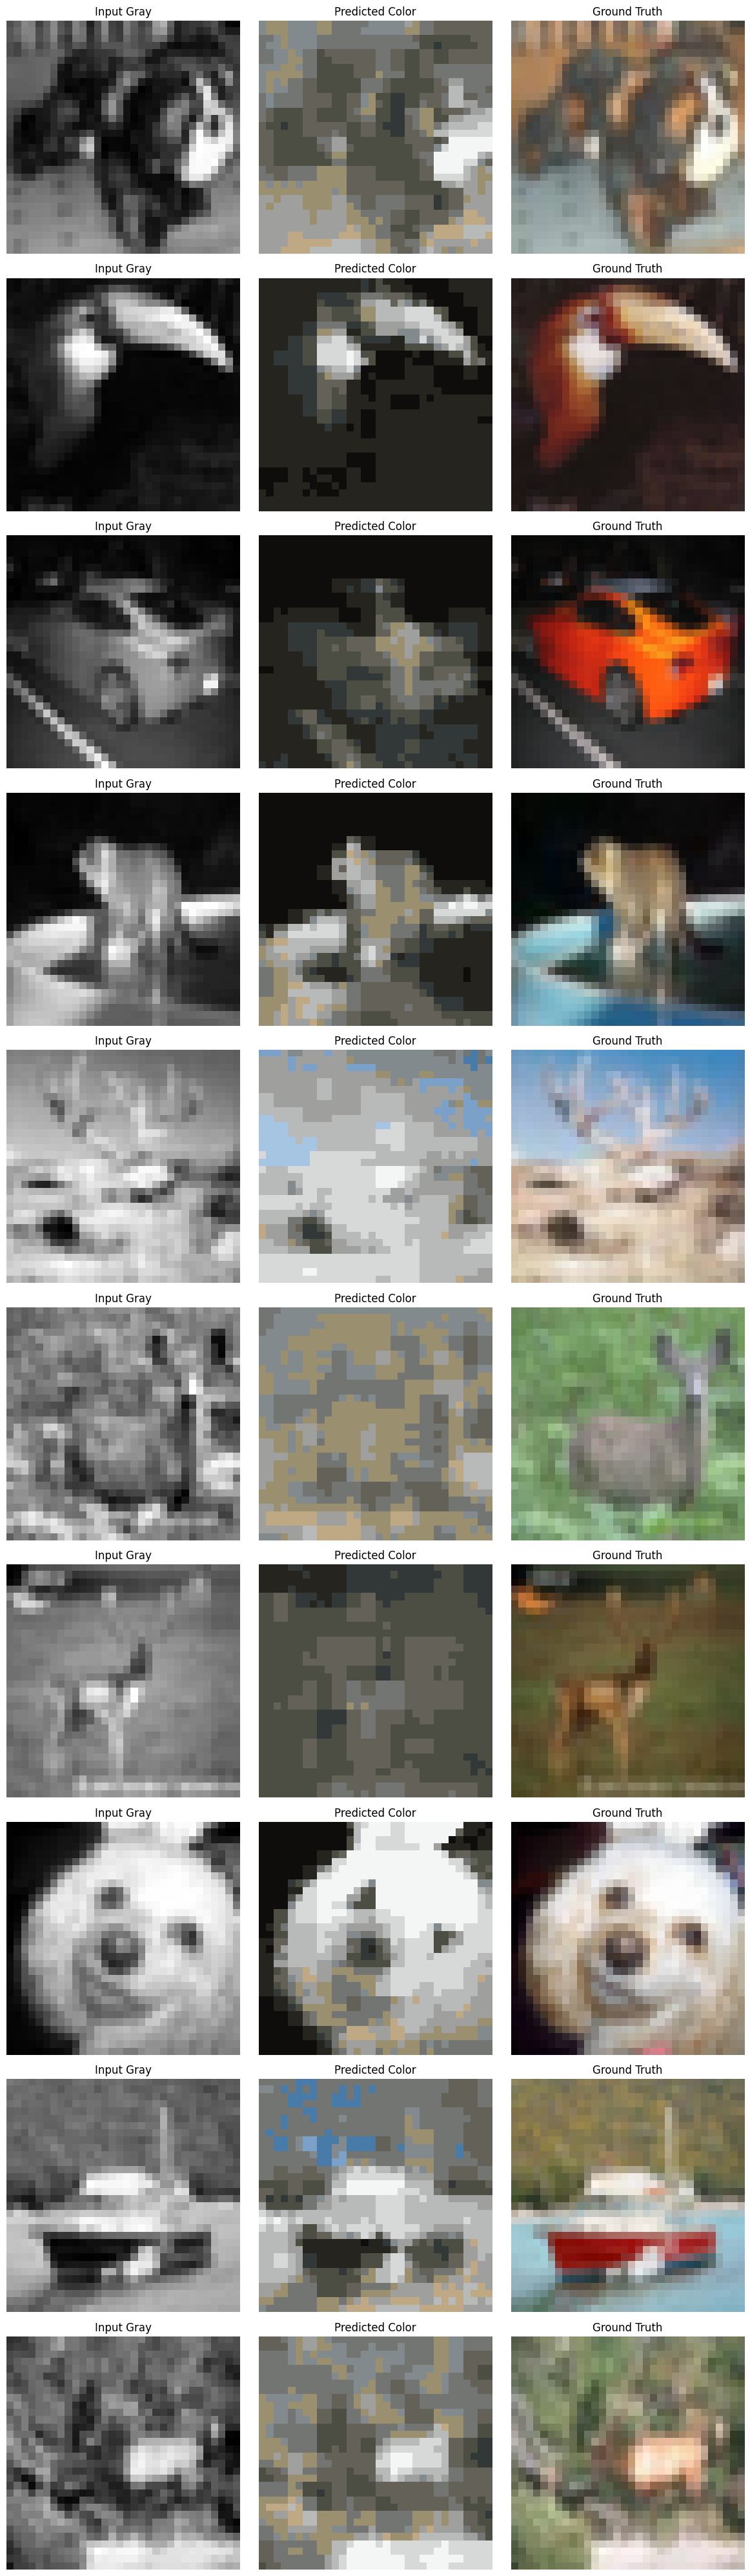

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run17_LR0.0001_BS128_NF16_K3_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 3.0318 | Val Loss: 2.7862
-> Saved new best model with Val Loss: 2.7862
Epoch 2/25 | Train Loss: 2.5928 | Val Loss: 2.4248
-> Saved new best model with Val Loss: 2.4248
Epoch 3/25 | Train Loss: 2.3403 | Val Loss: 2.2581
-> Saved new best model with Val Loss: 2.2581
Epoch 4/25 | Train Loss: 2.2153 | Val Loss: 2.1668
-> Saved new best model with Val Loss: 2.1668
Epoch 5/25 | Train Loss: 2.1442 | Val Loss: 2.1080
-> Saved new best model with Val Loss: 2.1080
Epoch 6/25 | Train Loss: 2.0955 | Val Loss: 2.0652
-> Saved new best model with Val Loss: 2.0652
Epoch 7/25 | Train Loss: 2.0599 | Val Loss: 2.0322
-> Saved new best model with Val Loss: 2.0322
Epoch 8/25 | Train Loss: 2.0305 | Val Loss: 2.0050
-> Saved new best model with Val Loss: 2.0050
Epoch 9/25 | Train Loss: 2.0071 | Val Loss: 1.9840
-> Saved new best model with Val Loss: 1.9840
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


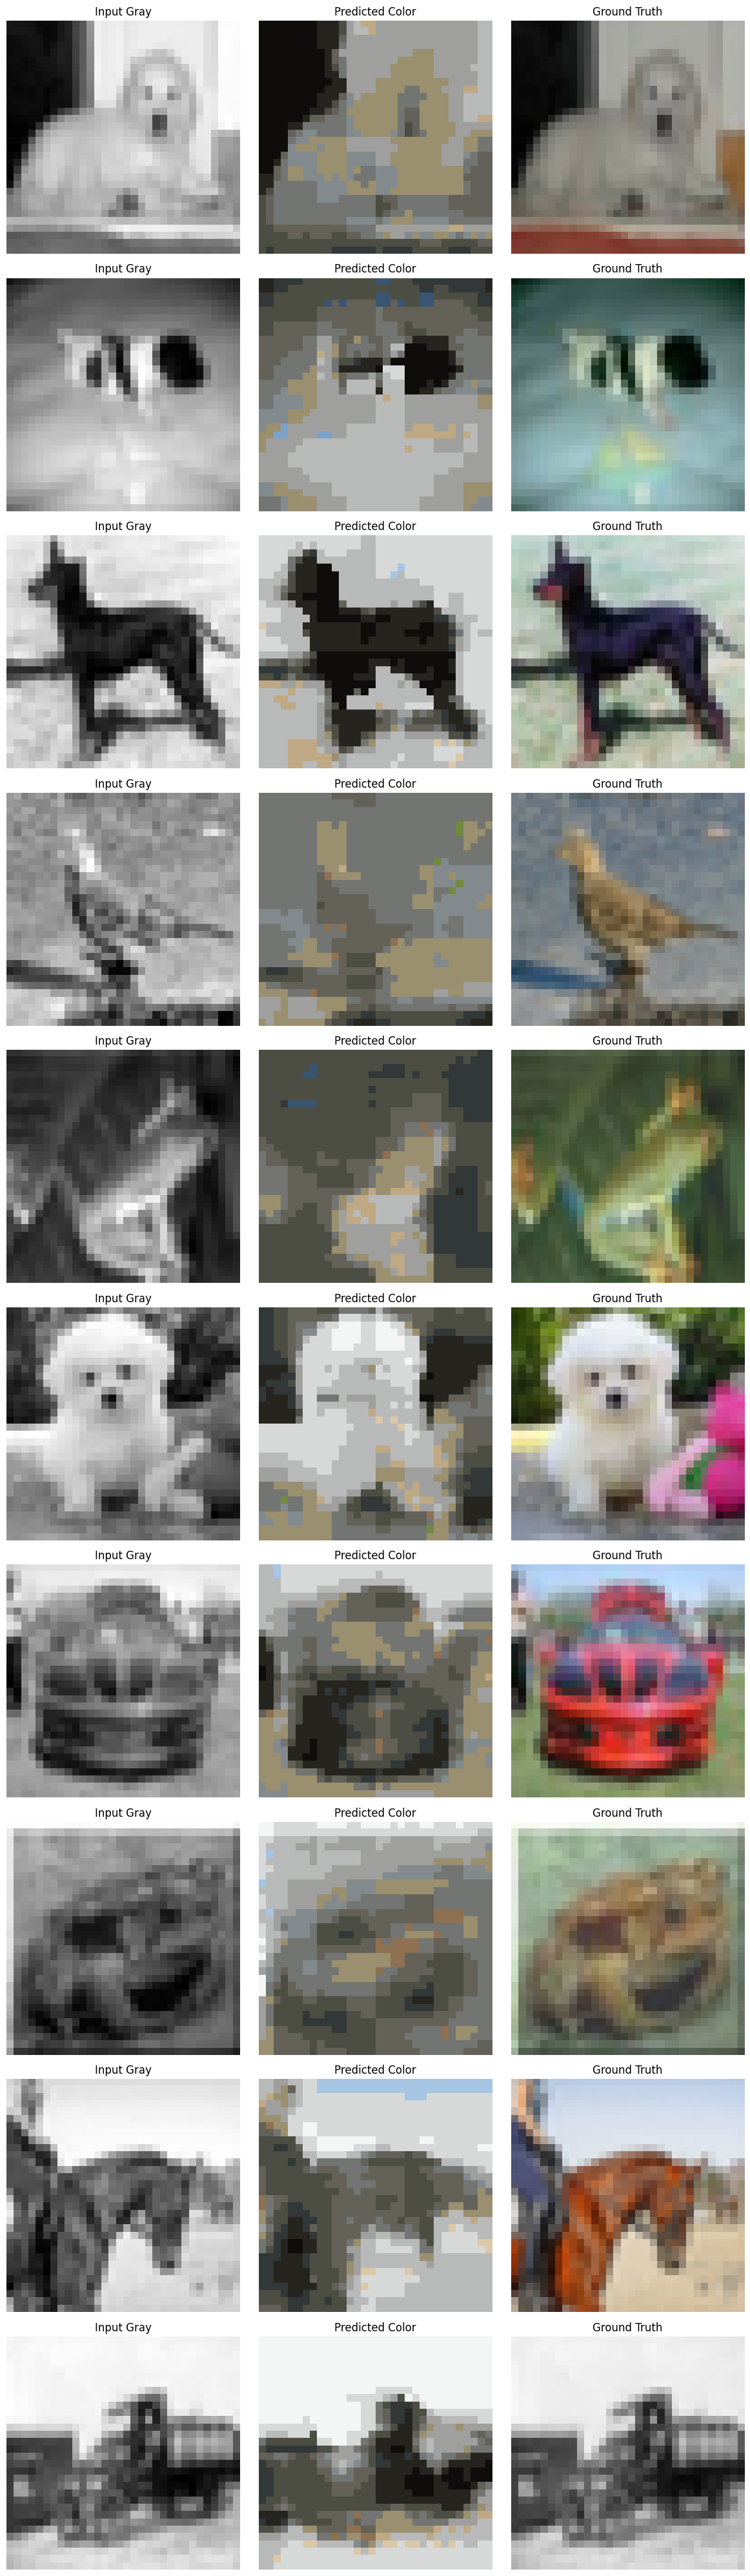

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run18_LR0.001_BS128_NF16_K3_SGD


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 3.0952 | Val Loss: 2.9802
-> Saved new best model with Val Loss: 2.9802
Epoch 2/25 | Train Loss: 2.9224 | Val Loss: 2.8699
-> Saved new best model with Val Loss: 2.8699
Epoch 3/25 | Train Loss: 2.8267 | Val Loss: 2.7815
-> Saved new best model with Val Loss: 2.7815
Epoch 4/25 | Train Loss: 2.7403 | Val Loss: 2.6966
-> Saved new best model with Val Loss: 2.6966
Epoch 5/25 | Train Loss: 2.6561 | Val Loss: 2.6130
-> Saved new best model with Val Loss: 2.6130
Epoch 6/25 | Train Loss: 2.5747 | Val Loss: 2.5355
-> Saved new best model with Val Loss: 2.5355
Epoch 7/25 | Train Loss: 2.5044 | Val Loss: 2.4758
-> Saved new best model with Val Loss: 2.4758
Epoch 8/25 | Train Loss: 2.4484 | Val Loss: 2.4196
-> Saved new best model with Val Loss: 2.4196
Epoch 9/25 | Train Loss: 2.4004 | Val Loss: 2.3759
-> Saved new best model with Val Loss: 2.3759
Epoch 10/25 | Train Lo

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


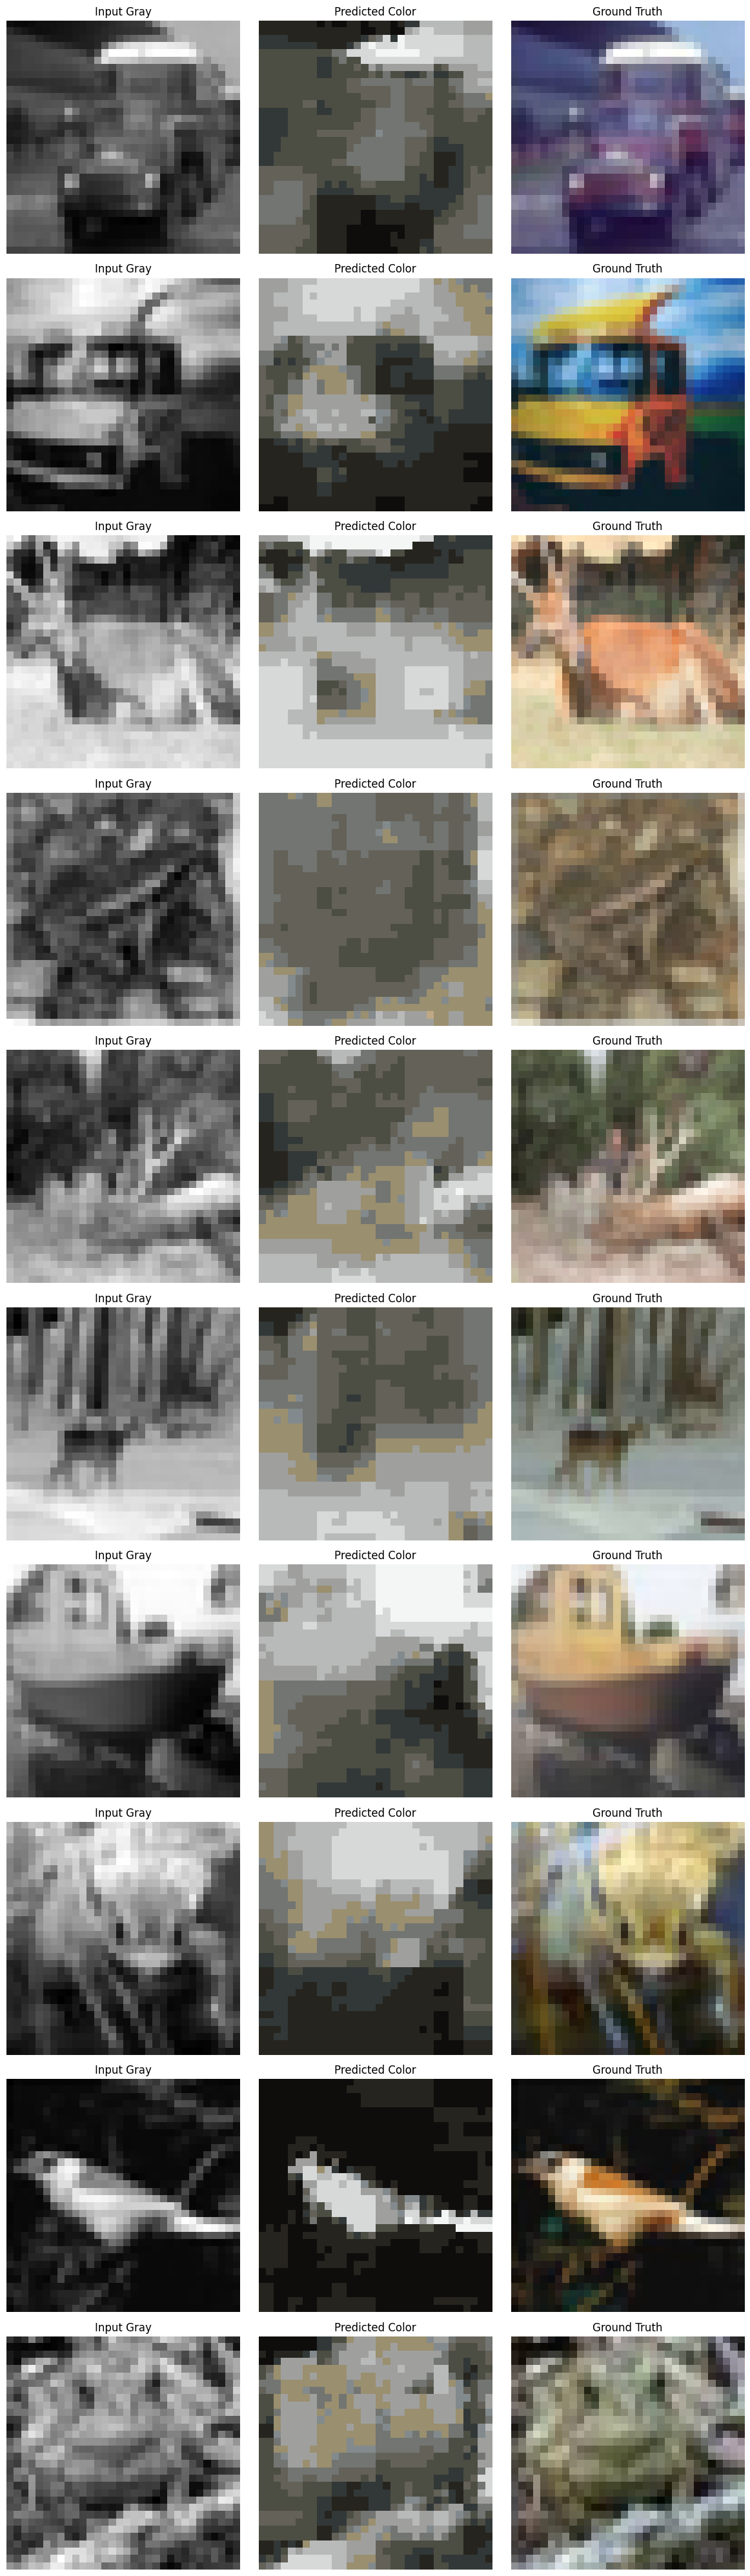

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run19_LR0.01_BS32_NF16_K3_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.0342 | Val Loss: 1.8901
-> Saved new best model with Val Loss: 1.8901
Epoch 2/25 | Train Loss: 1.9179 | Val Loss: 1.8674
-> Saved new best model with Val Loss: 1.8674
Epoch 3/25 | Train Loss: 1.8872 | Val Loss: 1.8267
-> Saved new best model with Val Loss: 1.8267
Epoch 4/25 | Train Loss: 1.8693 | Val Loss: 1.8407
Epoch 5/25 | Train Loss: 1.8521 | Val Loss: 1.7841
-> Saved new best model with Val Loss: 1.7841
Epoch 6/25 | Train Loss: 1.8395 | Val Loss: 1.8132
Epoch 7/25 | Train Loss: 1.8276 | Val Loss: 1.7740
-> Saved new best model with Val Loss: 1.7740
Epoch 8/25 | Train Loss: 1.8185 | Val Loss: 1.7849
Epoch 9/25 | Train Loss: 1.8065 | Val Loss: 1.7832
Epoch 10/25 | Train Loss: 1.8040 | Val Loss: 1.7783
Epoch 11/25 | Train Loss: 1.8008 | Val Loss: 1.8292
Epoch 12/25 | Train Loss: 1.7913 | Val Loss: 1.7698
-> Saved new best model with Val Loss: 1.7698
Epoc

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


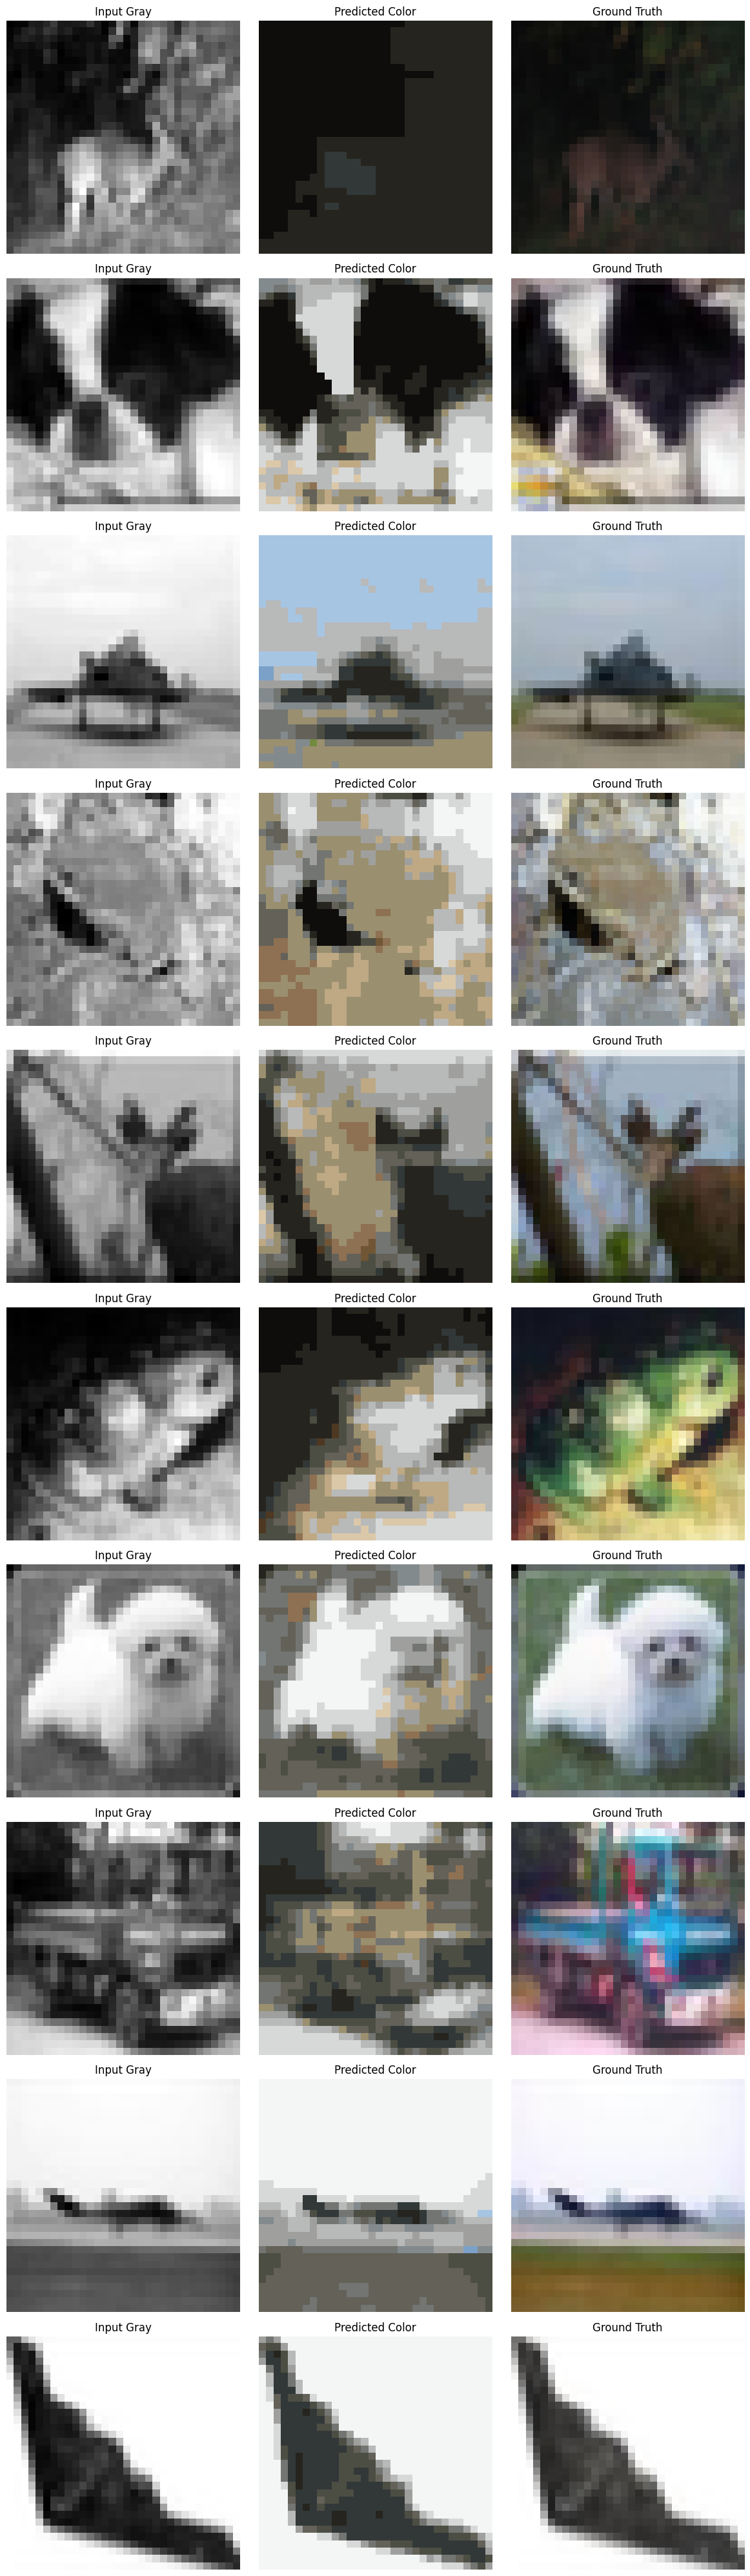

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Run20_LR0.001_BS128_NF32_K5_Adam


Files already downloaded and verified
Files already downloaded and verified
Starting training on cuda...
Epoch 1/25 | Train Loss: 2.1774 | Val Loss: 1.8460
-> Saved new best model with Val Loss: 1.8460
Epoch 2/25 | Train Loss: 1.7399 | Val Loss: 1.7223
-> Saved new best model with Val Loss: 1.7223
Epoch 3/25 | Train Loss: 1.6536 | Val Loss: 1.6861
-> Saved new best model with Val Loss: 1.6861
Epoch 4/25 | Train Loss: 1.6128 | Val Loss: 1.6467
-> Saved new best model with Val Loss: 1.6467
Epoch 5/25 | Train Loss: 1.5786 | Val Loss: 1.6379
-> Saved new best model with Val Loss: 1.6379
Epoch 6/25 | Train Loss: 1.5573 | Val Loss: 1.5739
-> Saved new best model with Val Loss: 1.5739
Epoch 7/25 | Train Loss: 1.5410 | Val Loss: 1.5236
-> Saved new best model with Val Loss: 1.5236
Epoch 8/25 | Train Loss: 1.5233 | Val Loss: 1.5108
-> Saved new best model with Val Loss: 1.5108
Epoch 9/25 | Train Loss: 1.5167 | Val Loss: 1.5287
Epoch 10/25 | Train Loss: 1.5091 | Val Loss: 1.4931
-> Saved new bes

/ssd_scratch/shubham/smai-a4/color/color_train.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(checkpoint_path))


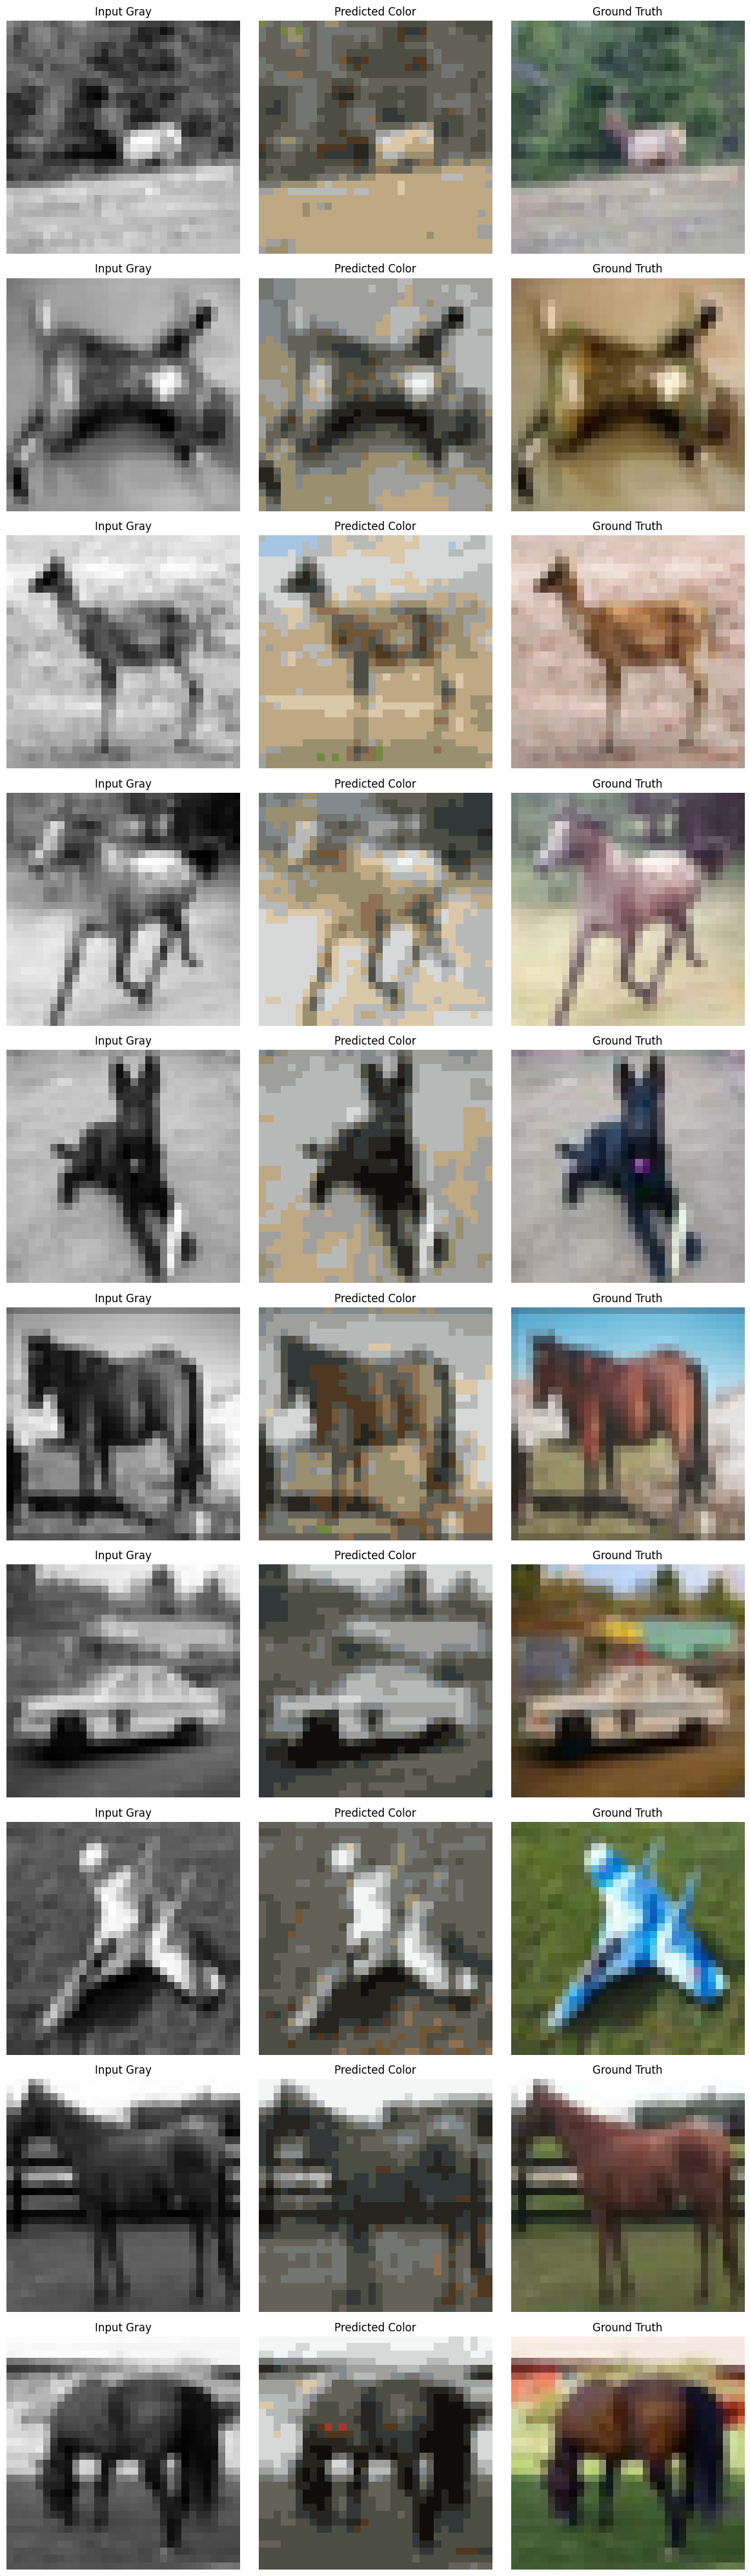

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [4]:
results = []
    
print(f"Starting sequential execution of {len(CONFIG_LIST)} runs...")
    
for i, config in enumerate(CONFIG_LIST):
        # Assign unique run name
        config['wandb_project'] = BASE_CONFIG['wandb_project']
        # Create a descriptive run name for wandb dashboard
        config['wandb_run_name'] = (
            f"Run{i+1}_LR{config['learning_rate']}_BS{config['batch_size']}_"
            f"NF{config['NF']}_K{config['kernel_size_conv']}_{config['optimizer']}"
        )

        print(config['wandb_run_name'])
        
        try:
            # 3. Run the model and capture results
            # NOTE: train_model(config) must be available and return the two losses.
            final_train_loss, best_val_loss = train_model(config)

            # 4. Store metrics
            results.append({
                'Run': i + 1,
                'LR': config['learning_rate'],
                'BS': config['batch_size'],
                'NF': config['NF'],
                'Kernel': config['kernel_size_conv'],
                'Optimizer': config['optimizer'],
                'Final Train Loss': final_train_loss,
                'Best Val Loss': best_val_loss
            })
            
        except Exception as e:
            print(f"!!! ERROR in run {i+1} ({config['wandb_run_name']}): {e}")
            if wandb.run:
                wandb.finish()

In [5]:
# 5. Display Final Summary Table
if results:
    df = pd.DataFrame(results).sort_values(by='Best Val Loss')
    print("\n" + "="*90)
    print(f"🚀 Hyperparameter Tuning Summary ({len(df)} Runs) - Sorted by Best Val Loss")
    print("="*90)
    print(df.to_string(index=False, float_format="%.4f"))
    print("\n" + "="*90)


🚀 Hyperparameter Tuning Summary (20 Runs) - Sorted by Best Val Loss
 Run     LR  BS  NF  Kernel Optimizer  Final Train Loss  Best Val Loss
  20 0.0010 128  32       5      Adam            1.4306         1.4212
   4 0.0100  64  32       5       SGD            1.4937         1.4525
  12 0.0001  32  32       5      Adam            1.5377         1.4854
   5 0.0001 128  32       5      Adam            1.5454         1.5292
   1 0.0100  32  32       3      Adam            1.6183         1.6013
  11 0.0010 128  32       3      Adam            1.6396         1.6309
  13 0.0100  32   8       5      Adam            1.6748         1.6461
   6 0.0001 128  16       5      Adam            1.6919         1.6706
  10 0.0100  64   8       5       SGD            1.7508         1.7154
  19 0.0100  32  16       3      Adam            1.7563         1.7317
  14 0.0010  64  16       5       SGD            1.7957         1.7562
   3 0.0001  32   8       5      Adam            1.8521         1.7948
   8 0.0